# LAB 01: DATA VISUALIZATION WITH PYTHON
### Môn học: Trực quan hóa dữ liệu
### GV hướng dẫn: Lê Nhựt Nam

Group 03
| Mã số sinh viên | Họ và tên | Phân công | Mức độ hoàn thành |
|:-----------:|-----------|-----------|:-----------:|
| 21120344 | Nguyễn Trọng Trí | Chọn dataset, tiền xử lý dữ liệu, xác định các vấn đề cần phân tích, cấu hình biểu đồ, phân tích và vẽ biểu đồ liên quan đến disabled comment và rating, kết luận, viết báo cáo | 25% |
| 21120321 | Nguyễn Văn Siêu | Phân tích và vẽ biểu đồ liên quan đến năm thu thập dữ liệu, mô tả các cột số liệu và không phải số liệu | 25% |
| 20120478 | Nguyễn Vũ Hiếu | Phân tích và vẽ biểu đồ liên quan đến tiêu đề và sự tương quan giữa các biến trong bộ dữ liệu| 25% |
| 19120521 | Lê Nhật Khánh Hưng | Phân tích và vẽ biểu đồ liên quan đến kênh, danh mục, thời điểm đăng video | 25% |


# Phân tích video thịnh hành trên Youtube

## Giới thiệu chung
YouTube là nền tảng video phổ biến nhất và được sử dụng nhiều nhất trên thế giới hiện nay. YouTube có một [danh sách các **video thịnh hành**](https://www.youtube.com/feed/trending) được cập nhật liên tục. Chúng ta sẽ sử dụng **Python** cùng với một số thư viện như **Pandas** and **Matplotlib** để phân tích bộ dữ liệu được thu thập trong vòng 473 ngày. Trong mỗi ngày đó, bộ dữ liệu chứa thông tin về các video thịnh hành của ngày hôm đó, tổng cộng **có hơn `98,000` video**. Chúng ta sẽ phân tích dữ liệu này để tìm hiểu sâu hơn về các video thịnh hành trên YouTube, cũng như khám phá những yếu tố chung của các video này. Những hiểu biết từ phân tích này có thể giúp những ai muốn tăng độ phổ biến của video của mình trên YouTube.

Bộ dữ liệu mà chúng ta sẽ sử dụng được lấy từ Kaggle tại [đây](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset). Nó chứa dữ liệu về các video thịnh hành ở nhiều quốc gia khác nhau. Ở đây, chúng ta sẽ phân tích các video thịnh hành tại Hoa Kỳ. Do YouTube đã tắt hiển thị số lượng **dislike** (không thích) từ tháng 11 năm 2021, chúng ta sẽ cắt bỏ dữ liệu từ thời điểm này trở đi. Điều này giúp đảm bảo rằng các phân tích dựa trên dữ liệu trước tháng 11 năm 2021 vẫn bao gồm đầy đủ các chỉ số tương tác của video, bao gồm cả lượt không thích, để đạt độ chính xác cao hơn trong việc tìm ra các yếu tố ảnh hưởng đến tính thịnh hành của video.

## Mục tiêu phân tích
Chúng ta muốn trả lời những câu hỏi như:
* Các video thịnh hành có bao nhiêu lượt xem? Phần lớn video này có lượt xem lớn không? Có phải cần nhiều lượt xem mới trở nên thịnh hành không??
* Những câu hỏi tương tự trên, nhưng áp dụng cho lượt thích và số bình luận thay vì lượt xem.
* Video nào đã xuất hiện lâu nhất trên danh sách video thịnh hành?
* Có bao nhiêu video thịnh hành có từ viết hoa hoàn toàn trong tiêu đề?
* Độ dài tiêu đề của các video thịnh hành là bao nhiêu? Độ dài này có liên quan gì đến việc video trở nên thịnh hành không?
* Các thuộc tính như lượt xem, lượt thích, không thích, số bình luận, độ dài tiêu đề, và các thuộc tính khác liên quan đến nhau như thế nào?
* Những từ phổ biến nhất trong tiêu đề của các video thịnh hành là gì?
* Các kênh YouTube nào có số lượng video thịnh hành nhiều nhất?
* Danh mục video nào (như Giải trí, Game, Hài, v.v.) có số lượng video thịnh hành nhiều nhất?
* Video thịnh hành được dăng khi nào? Vào những ngày nào trong tuần? Giờ nào trong ngày?

## Mục lục
* [Nhập các thư viện cần thiết](#import)
* [Đọc bộ dữ liệu](#read)
* [Khám phá bộ dữ liệu](#feel)
* [Làm sạch dữ liệu](#clean)
* [Năm thu thập dữ liệu](#coll)
* [Mô tả các cột số liệu](#descn)
    * [Biểu đồ phân bố lượt xem](#vh)
    * [Biểu đồ phân bố lượt thích](#lh)
    * [Biểu đồ phân bố số bình luận](#ch)
* [Mô tả các cột không phải số liệu](#descnn)
* [Bao nhiêu tiêu đề video thịnh hành có từ viết hoa?](#cap)
* [Độ dài tiêu đề video](#len)
* [Tương quan giữa các biến trong bộ dữ liệu](#corr)
* [Các từ phổ biến nhất trong tiêu đề video](#commti)
* [Các kênh nào có số lượng video thịnh hành lớn nhất?](#chan)
* [Danh mục video nào có số lượng video thịnh hành lớn nhất?](#cat)
* [Thời điểm đăng của video thịnh hành](#pub)
* [Có bao nhiêu video thịnh hành bị tắt bình luận?](#commdis)
* [Có bao nhiêu video thịnh hành bị tắt đánh giá (lượt thích và không thích)?](#ratdis)
* [Bao nhiêu video có cả bình luận và đánh giá bị tắt?](#commratdis)
* [Kết luận](#conc)

## <a name="import"></a>Nhập các thư viện cần thiết
Đầu tiên, chúng ta sẽ nhập một số thư viện Python hỗ trợ cho việc phân tích dữ liệu, đặc biệt là `pandas` để phân tích dữ liệu và `matplotlib` để trực quan hóa dữ liệu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [2]:
# Ẩn cảnh báo để hiển thị đẹp hơn
warnings.filterwarnings('ignore')

# Cấu hình một số tùy chọn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## <a name="read"></a>Đọc bộ dữ liệu
Sau đó chúng ta sẽ đọc tệp dữ liệu, được lưu ở định dạng CSV.

In [3]:
df = pd.read_csv("input/US_youtube_trending_data.csv")

Chúng ta thiết lập một số tùy chọn cấu hình để cải thiện việc hiển thị các biểu đồ

In [4]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set_theme(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## <a name="feel"></a> Khám phá bộ dữ liệu
Hãy cùng tìm hiểu bộ dữ liệu bằng cách hiển thị một vài hàng đầu tiên.

In [5]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


Bây giờ hãy xem một số thông tin về bộ dữ liệu

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98591 entries, 0 to 98590
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           98591 non-null  object
 1   title              98591 non-null  object
 2   publishedAt        98591 non-null  object
 3   channelId          98591 non-null  object
 4   channelTitle       98591 non-null  object
 5   categoryId         98591 non-null  int64 
 6   trending_date      98591 non-null  object
 7   tags               98591 non-null  object
 8   view_count         98591 non-null  int64 
 9   likes              98591 non-null  int64 
 10  dislikes           98591 non-null  int64 
 11  comment_count      98591 non-null  int64 
 12  thumbnail_link     98591 non-null  object
 13  comments_disabled  98591 non-null  bool  
 14  ratings_disabled   98591 non-null  bool  
 15  description        96882 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

Chúng ta có thể thấy rằng bộ dữ liệu có `98,591` entry. Tất cả các cột trong bộ dữ liệu đều hoàn chỉnh (chúng có `98,591` entry không null) ngoại trừ cột `description`, cột này có một số giá trị `null`; nó chỉ có `96,882` giá trị không null.

## <a name="clean"></a>Làm sạch dữ liệu
Cột `description` có một số giá trị null. Đây là một số hàng mà giá trị mô tả của chúng là null. Chúng ta có thể thấy rằng các giá trị null được ký hiệu bằng `NaN`

In [7]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
223,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-13T00:00:00Z,Lock|picking,422963,62939,168,7304,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,NaN
249,NYXABBpPJss,When you get on the grill for your friends Bir...,2020-08-12T04:36:57Z,UCI8hY4ummWDZgFSjxU_HFNQ,Jeremiah Phillips,23,2020-08-13T00:00:00Z,[None],193157,9057,148,666,https://i.ytimg.com/vi/NYXABBpPJss/default.jpg,False,False,NaN
446,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-14T00:00:00Z,Lock|picking,511773,69610,214,7837,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,NaN


Để thực hiện một số công việc làm sạch dữ liệu và loại bỏ các giá trị null, chúng ta sẽ thay thế mỗi giá trị null trong cột `description` bằng một chuỗi rỗng.

In [8]:
df["description"] = df["description"].fillna(value="")

## <a name="coll"></a>Năm thu thập dữ liệu
Hãy xem dữ liệu được thu thập vào những năm nào

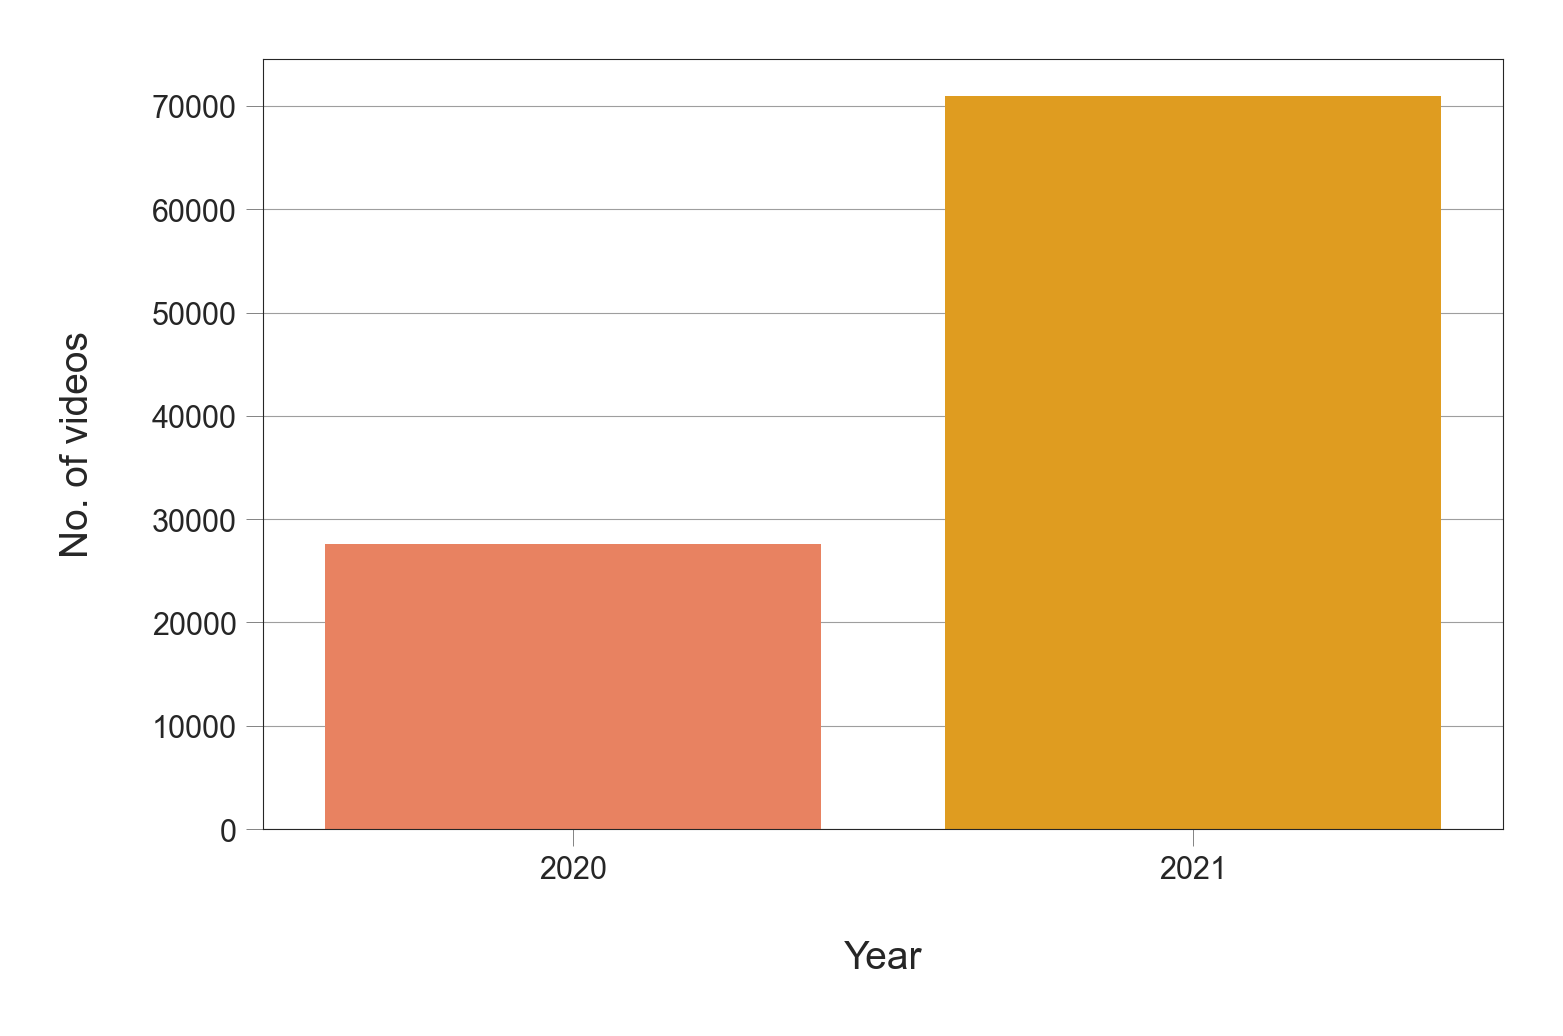

In [9]:
cdf = df["trending_date"].apply(lambda x: x[:4]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"trending_date": "year", "count": "No_of_videos"}).sort_values("year", ascending=True)

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [10]:
df["trending_date"].apply(lambda x: x[:4]).value_counts(normalize=True)

trending_date
2021   0.72
2020   0.28
Name: proportion, dtype: float64

Chúng ta có thể thấy bộ dữ liệu được thu thập vào năm 2020 và 2021 với `72%` vào năm 2021 và `23%` vào năm 2020.

## <a name="descn"></a>Mô tả các cột số liệu
Hãy cùng xem một số thông tin thống kê về các cột số liệu trong tập dữ liệu của chúng ta.

In [11]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,98591.00,98591.00,98591.00,98591.00,98591.00
mean,18.75,2788942.49,152037.62,3092.36,13618.75
std,6.85,7313460.53,433708.62,13057.45,95844.16
min,1.00,0.00,0.00,0.00,0.00
25%,17.00,534680.50,21595.50,369.00,1678.00
50%,20.00,1106637.00,51980.00,851.00,3831.00
75%,24.00,2489501.50,132009.50,2224.00,9244.50
max,29.00,264407389.00,16021534.00,879354.00,6738537.00


Chúng ta có thể ghi nhận từ bảng ở trên:
- Số lượt xem trung bình của một video thịnh hành là `2,788,942`. Giá trị trung vị cho số lượt xem là `1,106,637`, tức là một nửa số video thịnh hành có số lượt xem thấp hơn con số đó, và nửa còn lại có số lượt xem lớn hơn con số đó
- Số lượt thích trung bình của một video thịnh hành là `152,037`, trong khi số lượt không thích trung bình là `3,092`
- Số lượng bình luận trung bình là `13,618` trong khi giá trị trung vị là `3,831`

Những quan sát trên có hữu ích không? Chúng có thực sự đại diện cho dữ liệu không? Hãy xem xét thêm.

### <a name="vh"></a>Biểu đồ phân bố lượt xem
Hãy vẽ một biểu đồ [histogram](https://www.mathsisfun.com/data/histograms.html) cho cột `view_count` để xem xét sự phân bố của nó: để thấy có bao nhiêu video từ `10` triệu đến `20` triệu lượt xem, có bao nhiêu video từ `20` triệu đến `30` triệu lượt xem, và v.v.

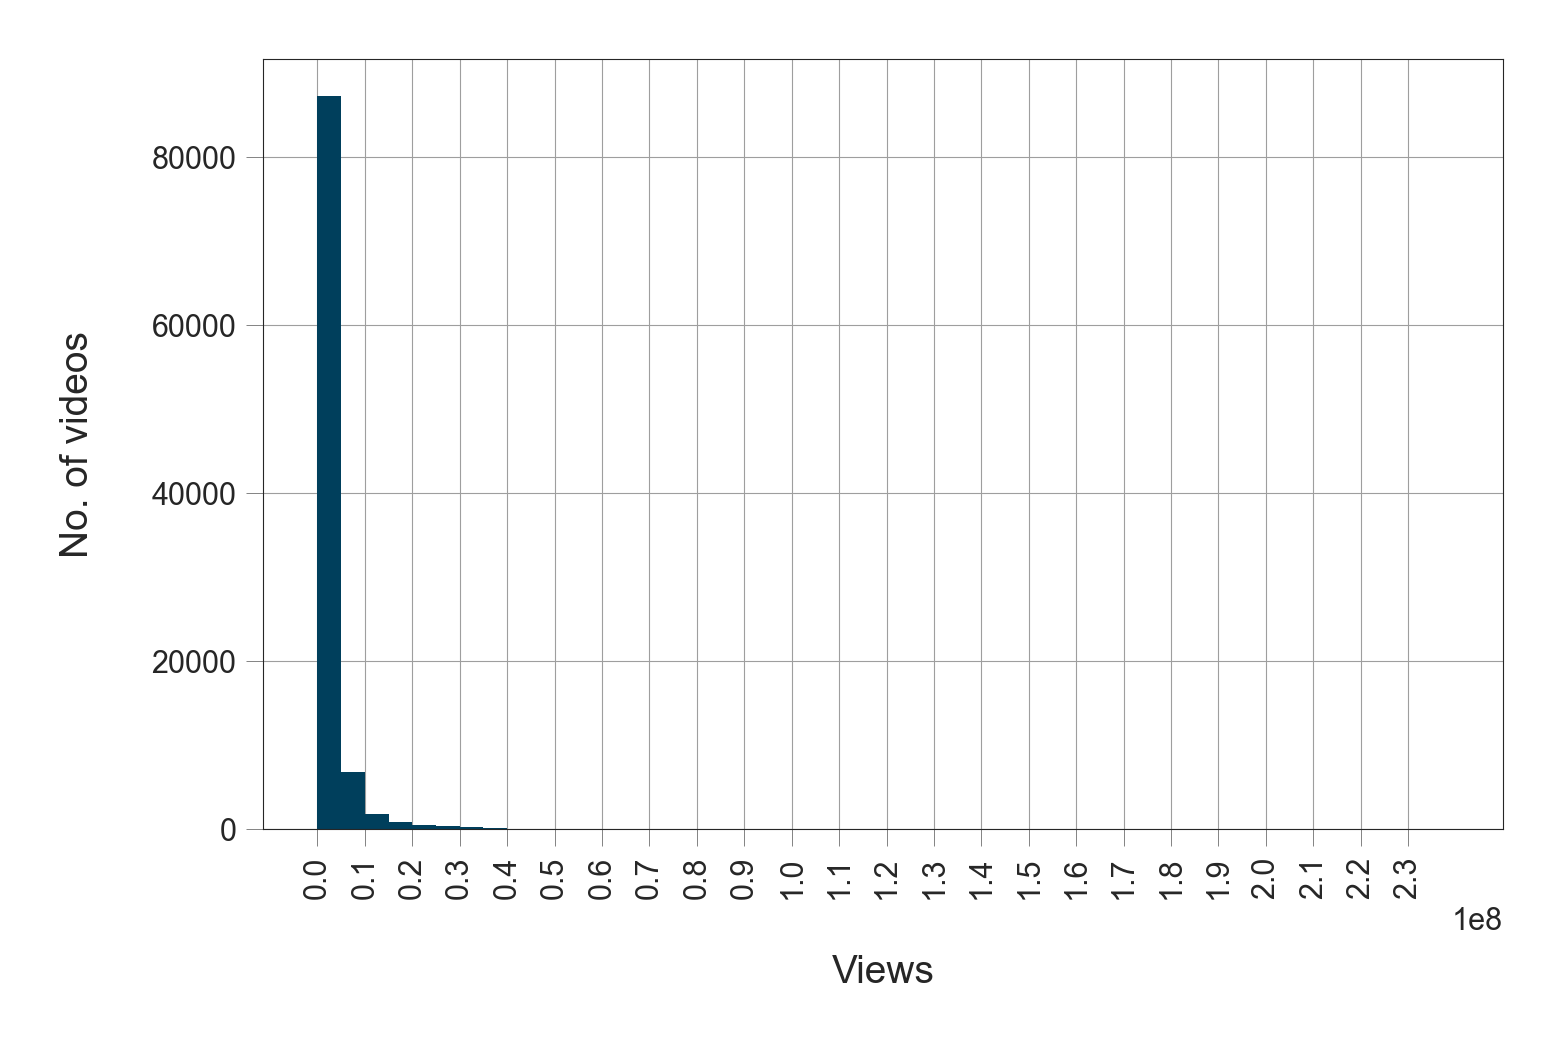

In [12]:
fig, ax = plt.subplots()
_ = sns.histplot(df["view_count"], kde=False, color=PLOT_COLORS[4], 
                bins=np.linspace(0, 2.3e8, 47), ax=ax, alpha=1)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

Chúng ta ghi nhận rằng phần lớn các video thịnh hành có `5` triệu lượt xem hoặc ít hơn. Chúng ta có được con số `5` triệu này bằng cách tính toán:

\begin{align}
\frac{0.1 \times 10^8}{2} = 5 \times 10^6
\end{align}

Bây giờ, hãy vẽ biểu đồ histogram chỉ cho các video có `25` triệu lượt xem hoặc ít hơn để có cái nhìn rõ hơn về phân bố của dữ liệu.

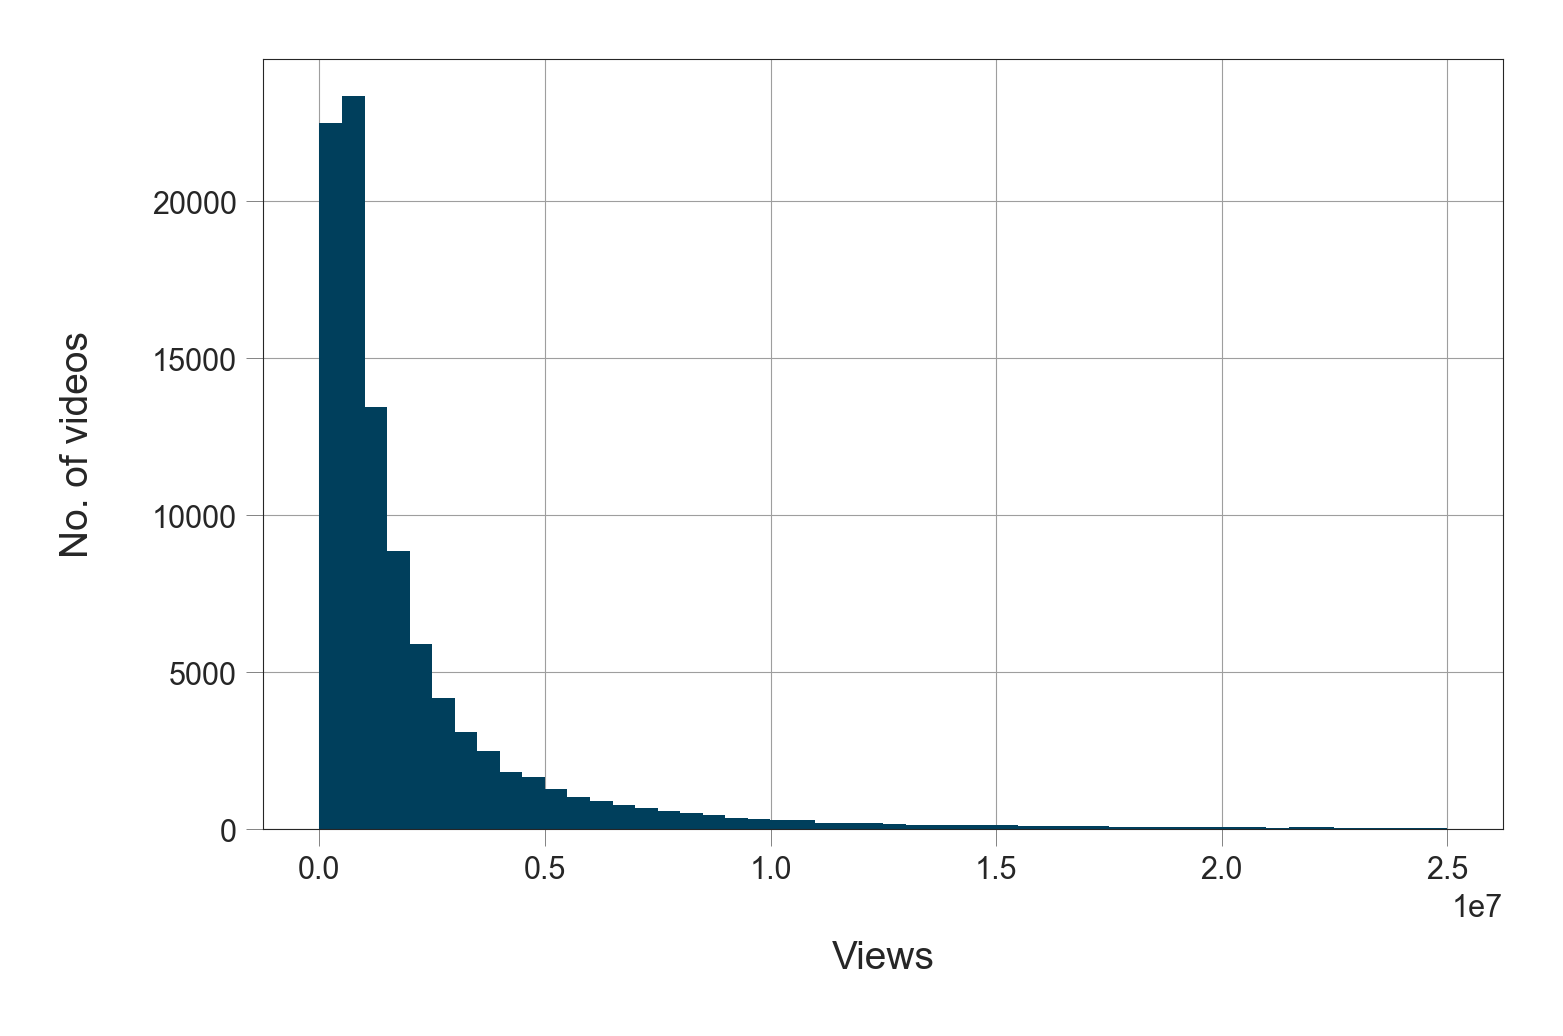

In [13]:
fig, ax = plt.subplots()
_ = sns.histplot(df[df["view_count"] < 25e6]["view_count"], kde=False, 
                color=PLOT_COLORS[4], ax=ax, alpha=1, bins=50)

_ = ax.set(xlabel="Views", ylabel="No. of videos")

Giờ chúng ta có thể thấy phần lớn các video thịnh hành có `1.5` triệu lượt xem hoặc ít hơn. Hãy xem phần trăm chính xác của những video có ít hơn `1.5` triệu lượt xem

In [14]:
df[df['view_count'] < 1.5e6]['view_count'].count() / df['view_count'].count() * 100

np.float64(60.1505208386161)

Vậy nó khoảng `60%`. Tương tự, chúng ta có thể thấy phần trăm video có ít hơn `2.5` triệu lượt xem vào khoảng `75%`, và phần trăm video dưới `5` triệu lượt xem vào khoảng `88%`.

### <a name="lh"></a>Biểu đồ phân bố lượt thích

Sau `view_count`, ta vẽ biểu đồ histogram cho cột `likes`

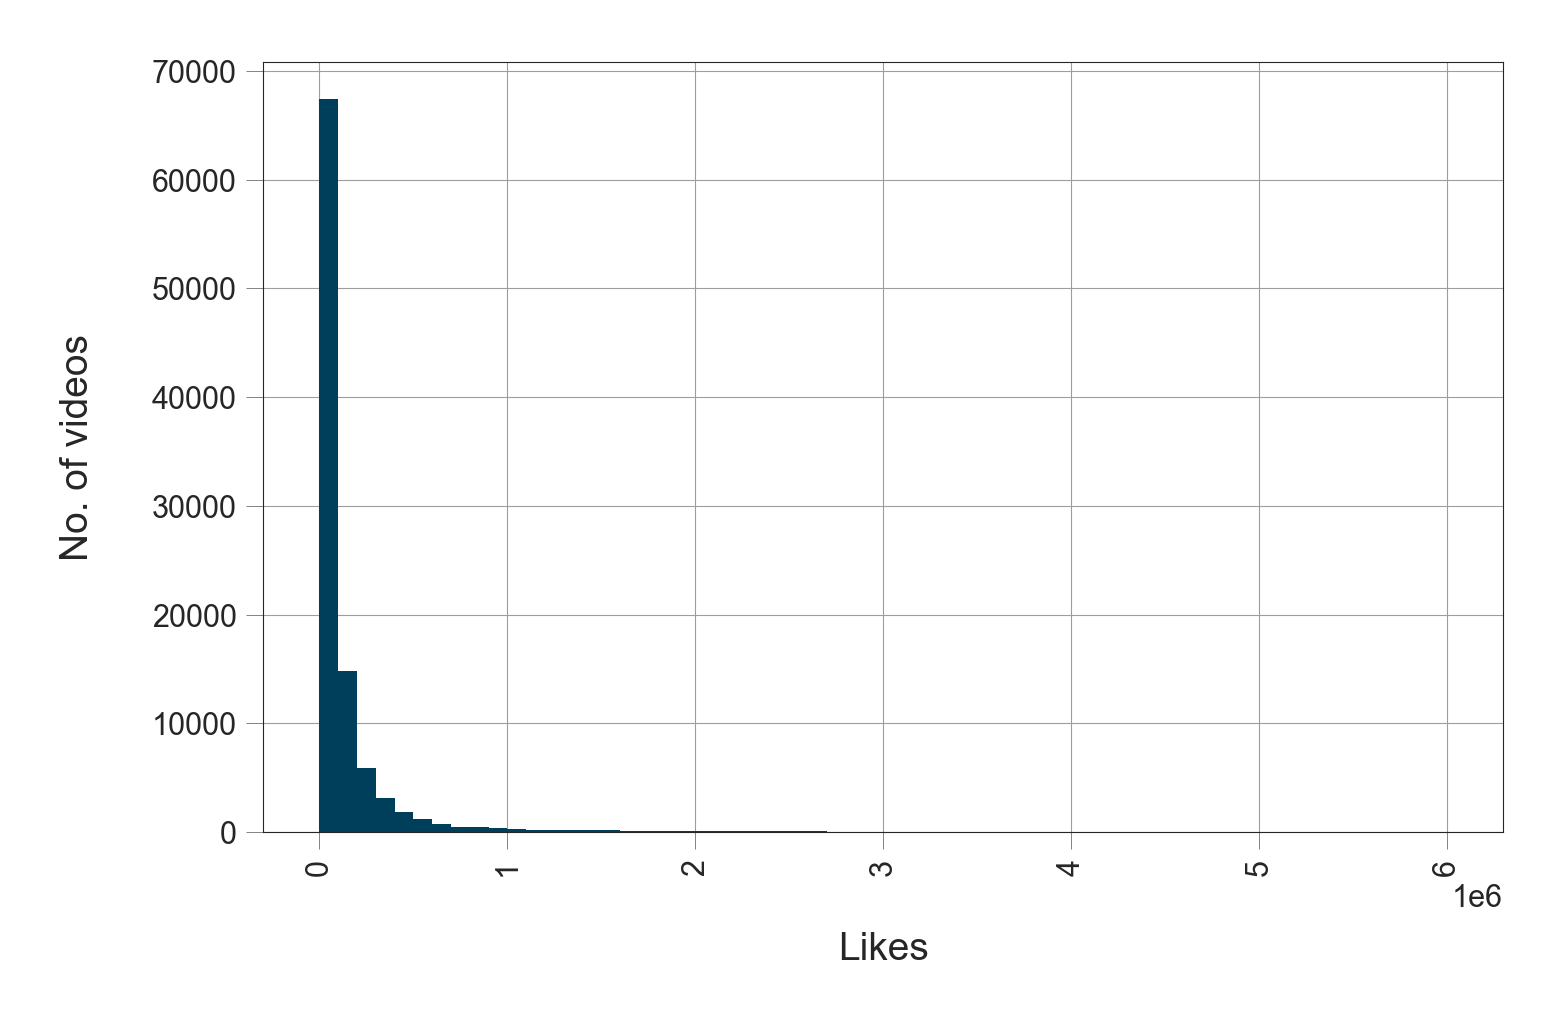

In [15]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.histplot(df["likes"], kde=False, 
                color=PLOT_COLORS[4], alpha=1, 
                bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

Chúng ta ghi nhận rằng phần lớn các video thịnh hành có từ `0` đến `100,000` lượt thích. Hãy vẽ biểu đồ histogram cho các video có `100,000` lượt thích hoặc ít hơn để có cái nhìn rõ ràng hơn về phân bố của dữ liệu

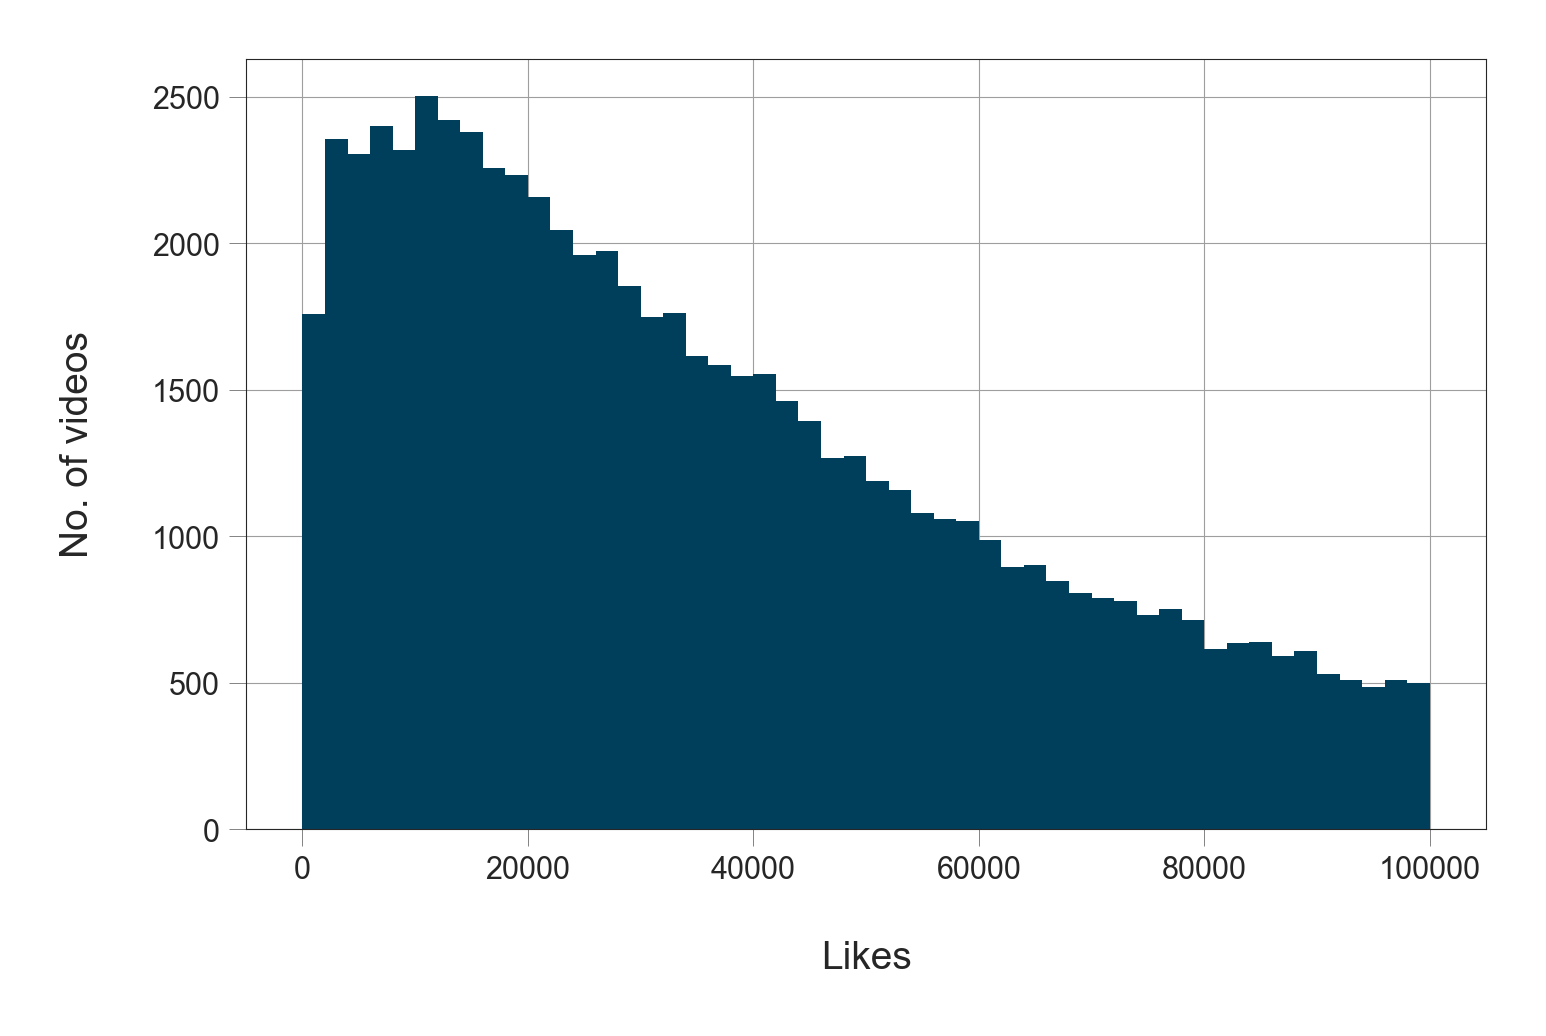

In [16]:
fig, ax = plt.subplots()
_ = sns.histplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                color=PLOT_COLORS[4], alpha=1, ax=ax, bins=50)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Ta có thể thấy số video thịnh hành giảm dần đều khi số lượt thích tăng lên, với phần lớn các video có `60000` lượt thích hoặc ít hơn.

Hãy xem phần trăm chính xác của những video có ít hơn `60000` lượt thích

In [17]:
df[df['likes'] < 6e4]['likes'].count() / df['likes'].count() * 100

np.float64(54.41571745899727)

Tương tự, chúng ta có thể thấy phần trăm video có ít hơn `100000` lượt thích vào khoảng `68%`

### <a name="ch"></a>Biểu đồ phân bố số bình luận

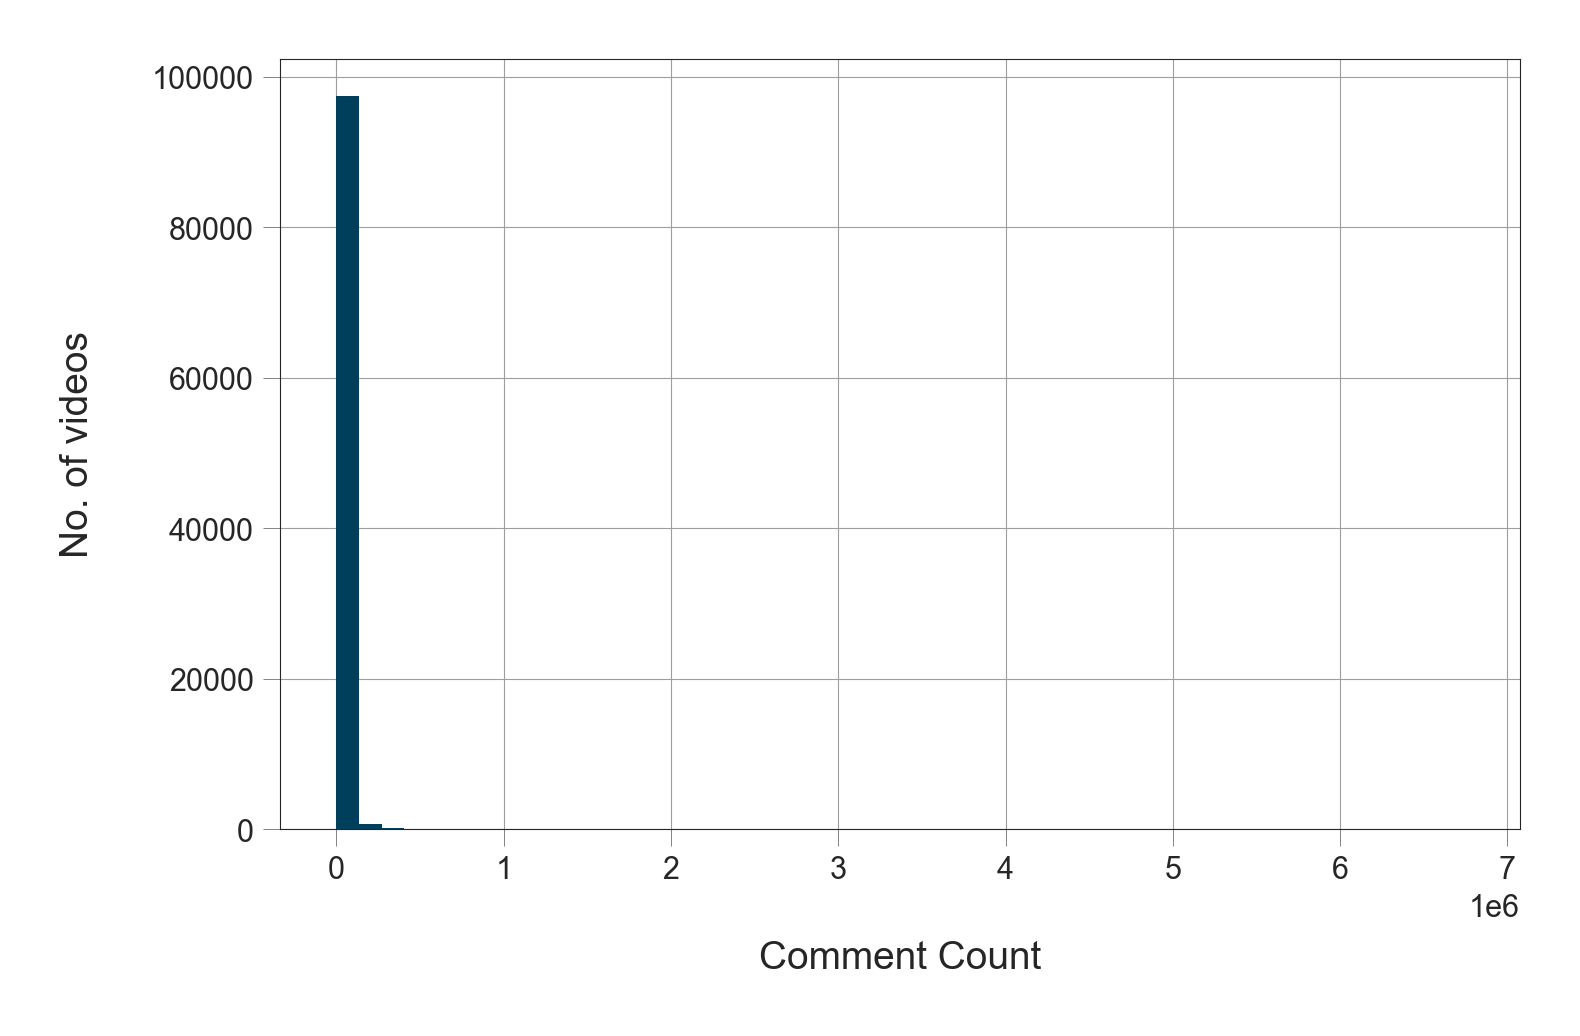

In [18]:
fig, ax = plt.subplots()
_ = sns.histplot(df["comment_count"], kde=False, 
                color=PLOT_COLORS[4], alpha=1, ax=ax, bins=50)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

Loại bỏ các entry với hơn `200000` bình luận để có cái nhìn rõ hơn

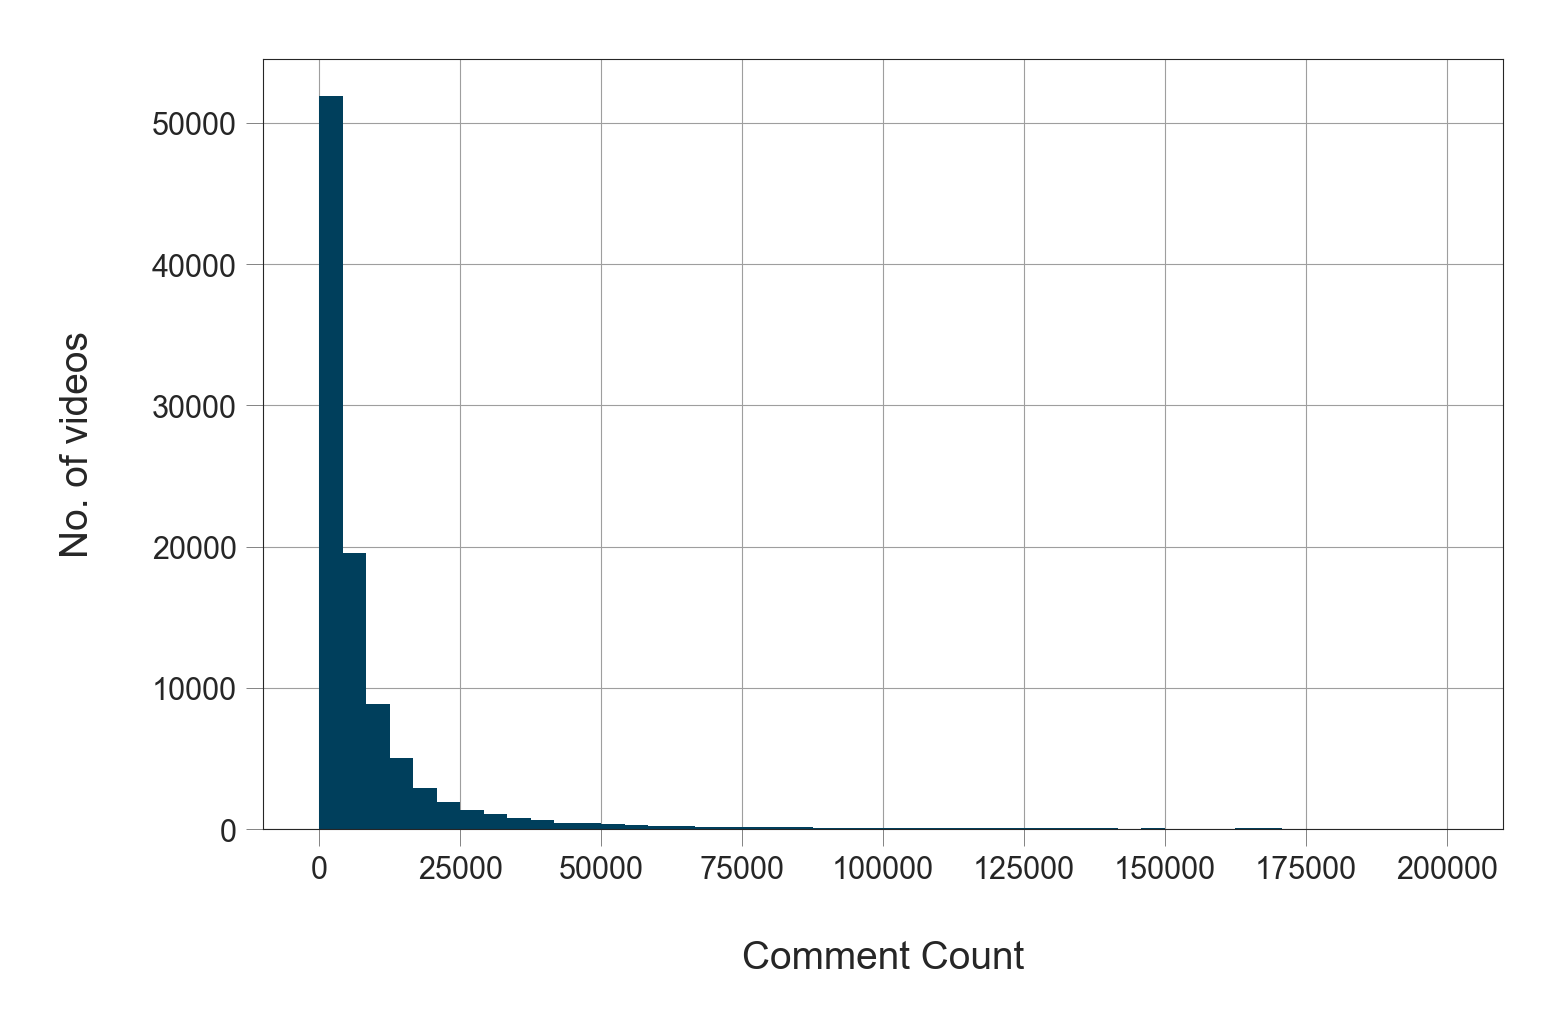

In [19]:
fig, ax = plt.subplots()
_ = sns.histplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, 
                color=PLOT_COLORS[4], alpha=1, 
                bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

We see that most trending videos have around
Chúng ta có thể thấy hầu hết các video thịnh hành có khoảng

\begin{align}
\frac{25000}{6} \approx 4166 \text{ comments}
\end{align}

vì mỗi khoảng trên biểu đồ bao gồm sáu cột histogram.

Tương tự như với lượt xem và lượt thích, hãy xem chính xác phần trăm các video có ít hơn `4000` bình luận.

In [20]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

np.float64(51.36472903206175)

Tương tự, chúng ta có thể thấy rằng phần trăm video có ít hơn `25,000` bình luận vào khoảng `91%`.

## <a name="descnn"></a>Mô tả các cột không phải số liệu
Sau khi đã mô tả các cột số liệu, ta tiến hành mô tả các cột không phải số liệu

In [21]:
df.describe(include=['O'])

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,thumbnail_link,description
count,98591,98591,98591,98591,98591,98591,98591,98591,98591
unique,17403,17990,17321,4677,4748,473,13304,17612,18304
top,#NAME?,Starlink Mission,2021-06-04T04:00:11Z,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,2021-06-17T00:00:00Z,[None],https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,
freq,1157,89,43,630,630,400,14792,36,1709


Từ bảng trên ta có thể thấy có `473` ngày duy nhất, nghĩa là bộ dữ liệu chứa thông tin được thu thập về các video thịnh hành qua **`473`** ngày.

Từ mô tả của `video_id`, ta có thể thấy có `98591` video (vì bộ dữ liệu của chúng ta có `98591` entry), nhưng chỉ có `17403` video duy nhất, nghĩa là một vài video xuất hiện trên danh sách video thịnh hành **hơn một ngày**.
Bảng cũng cho chúng ta biết rằng tiêu đề phổ biến nhất là `Starlink Mission` và nó đã xuất hiện `89` lần trong danh sách video thịnh hành.

Tuy nhiên, có điều gì đó kỳ lạ trong bảng mô tả ở trên: Bởi vì có `17403` ID video duy nhất, chúng ta kỳ vọng sẽ có `17403` tiêu đề video duy nhất, vì chúng ta giả định rằng mỗi ID liên kết với một tiêu đề tương ứng. Một cách giải thích khả thi là một video thịnh hành có một tiêu đề khi nó xuất hiện trong danh sách thịnh hành, sau đó nó lại xuất hiện vào một ngày khác nhưng với một tiêu đề đã được chỉnh sửa. Giải thích tương tự cũng áp dụng cho cột `description`.

Đối với cột `publishAt`, các giá trị duy nhất ít hơn `17403`, nhưng không có gì kỳ lạ ở đây, vì hai video khác nhau có thể được đăng vào cùng một thời điểm.

Ta có thể thấy video_id phổ biến nhất là `#NAME?`, các giá trị này là giá trị lỗi và sẽ không được sử dụng. Tuy nhiên, ta khó có thể thay thế các giá trị này do tính chất duy nhất và phức tạp của `video_id`, nhưng vẫn có thể giữ các dòng dữ liệu để phân tích, chỉ cần cần thận khi làm việc với cột `video_id`. 

Để xác minh giải thích của chúng ta cho cột `title`, hãy xem một ví dụ trong đó một video thịnh hành xuất hiện nhiều hơn một lần trong danh sách thịnh hành nhưng với các tiêu đề khác nhau.

In [22]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    if key != '#NAME?':  # Loại trừ video_id '#NAME?'
        groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[1]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
31800,0S7vC6RzHq0,Minecraft Achievement Hunt...,2021-01-22T06:04:42Z,UCqynl7rdtktKMQESdSBmE-g,Sapnap,20,2021-01-22T00:00:00Z,Minecraft|Challenge|Sapnap|colorblind|Dream|Mi...,689659,140292,682,9880,https://i.ytimg.com/vi/0S7vC6RzHq0/default.jpg,False,False,Minecraft Achievement Hunt... Can we complete ...
32000,0S7vC6RzHq0,Minecraft Achievement Hunt...,2021-01-22T06:04:42Z,UCqynl7rdtktKMQESdSBmE-g,Sapnap,20,2021-01-23T00:00:00Z,Minecraft|Challenge|Sapnap|colorblind|Dream|Mi...,2213853,202441,2119,11881,https://i.ytimg.com/vi/0S7vC6RzHq0/default.jpg,False,False,Minecraft Achievement Hunt... Can we complete ...
32215,0S7vC6RzHq0,Minecraft Achievement Race...,2021-01-22T06:04:42Z,UCqynl7rdtktKMQESdSBmE-g,Sapnap,20,2021-01-24T00:00:00Z,Minecraft|Challenge|Sapnap|colorblind|Dream|Mi...,2916031,223596,2613,12495,https://i.ytimg.com/vi/0S7vC6RzHq0/default.jpg,False,False,Minecraft Achievement Race... Can we complete ...
32679,0S7vC6RzHq0,Minecraft Achievement Race...,2021-01-22T06:04:42Z,UCqynl7rdtktKMQESdSBmE-g,Sapnap,20,2021-01-26T00:00:00Z,Minecraft|Challenge|Sapnap|colorblind|Dream|Mi...,3358979,251653,2940,13138,https://i.ytimg.com/vi/0S7vC6RzHq0/default.jpg,False,False,Minecraft Achievement Race... Can we complete ...
32911,0S7vC6RzHq0,Minecraft Achievement Race...,2021-01-22T06:04:42Z,UCqynl7rdtktKMQESdSBmE-g,Sapnap,20,2021-01-27T00:00:00Z,Minecraft|Challenge|Sapnap|colorblind|Dream|Mi...,3618620,267911,3162,13542,https://i.ytimg.com/vi/0S7vC6RzHq0/default.jpg,False,False,Minecraft Achievement Race... Can we complete ...
33137,0S7vC6RzHq0,Minecraft Achievement Race...,2021-01-22T06:04:42Z,UCqynl7rdtktKMQESdSBmE-g,Sapnap,20,2021-01-28T00:00:00Z,Minecraft|Challenge|Sapnap|colorblind|Dream|Mi...,3897534,284042,3390,13910,https://i.ytimg.com/vi/0S7vC6RzHq0/default.jpg,False,False,Minecraft Achievement Race... Can we complete ...
33372,0S7vC6RzHq0,Minecraft Achievement Race...,2021-01-22T06:04:42Z,UCqynl7rdtktKMQESdSBmE-g,Sapnap,20,2021-01-29T00:00:00Z,Minecraft|Challenge|Sapnap|colorblind|Dream|Mi...,4148825,296336,3612,14202,https://i.ytimg.com/vi/0S7vC6RzHq0/default.jpg,False,False,Minecraft Achievement Race... Can we complete ...
33595,0S7vC6RzHq0,Minecraft Achievement Race...,2021-01-22T06:04:42Z,UCqynl7rdtktKMQESdSBmE-g,Sapnap,20,2021-01-30T00:00:00Z,Minecraft|Challenge|Sapnap|colorblind|Dream|Mi...,4312390,303383,3759,14413,https://i.ytimg.com/vi/0S7vC6RzHq0/default.jpg,False,False,Minecraft Achievement Race... Can we complete ...


Ta có thể thấy video này xuất hiện trong danh sách với 2 tiêu đề khác nhau.

## <a name="cap"></a>Bao nhiêu tiêu đề video thịnh hành có từ viết hoa?
Giờ chúng ta muốn xem có bao nhiêu tiêu đề video thịnh hành chứa ít nhất một từ viết hoa. Để làm điều đó, chúng ta sẽ thêm một biến (cột) mới vào bộ dữ liệu, với giá trị là `True` nếu tiêu đề video có ít nhất một từ viết hoa, và `False` nếu không

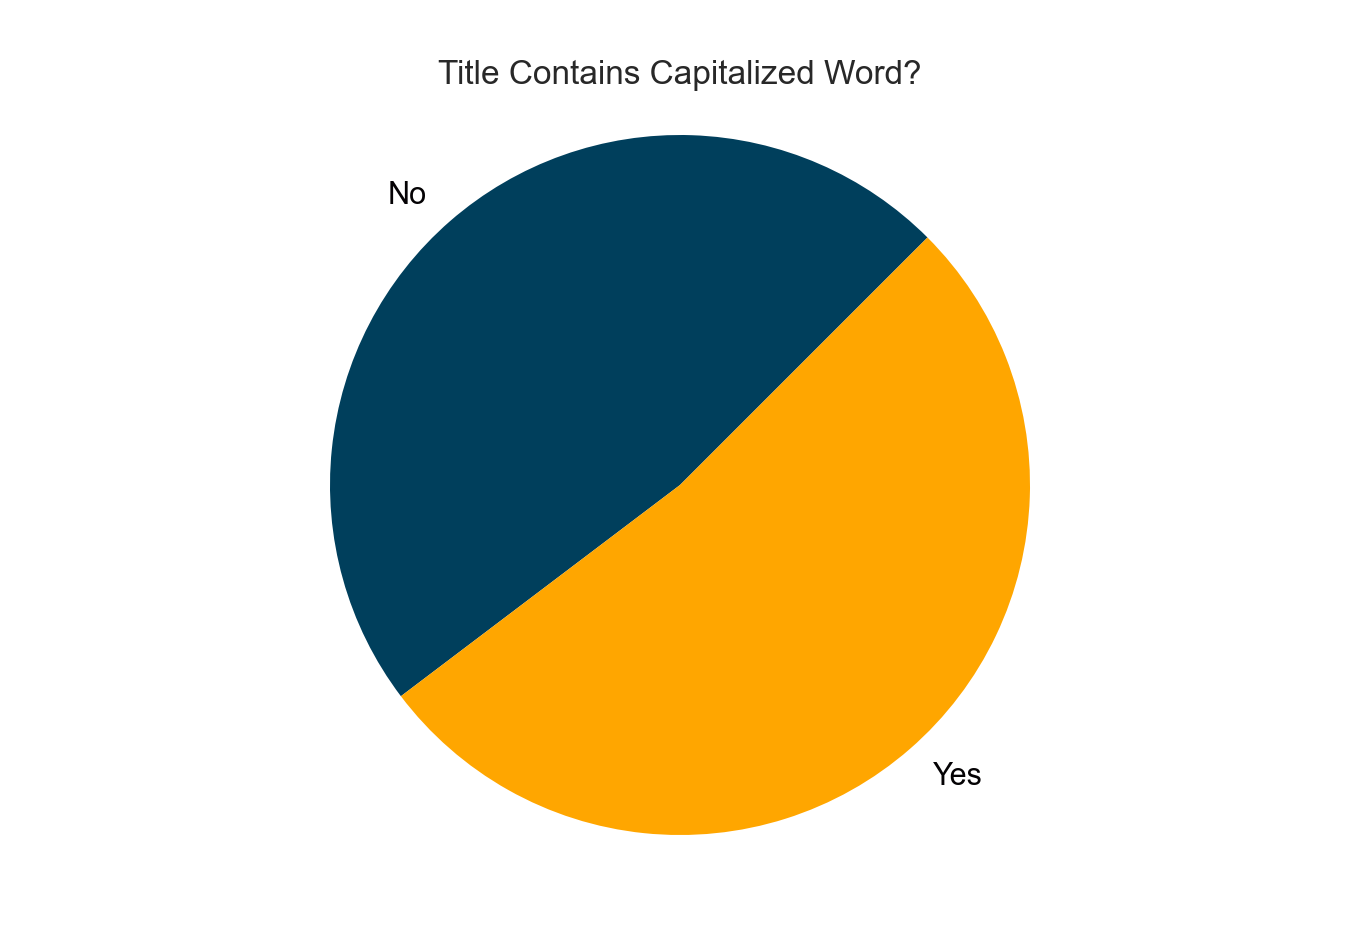

In [23]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [24]:
df["contains_capitalized"].value_counts(normalize=True)

contains_capitalized
True    0.52
False   0.48
Name: proportion, dtype: float64

Chúng ta có thể thấy rằng `52%` tiêu đề video thịnh hành chứa ít nhất một từ viết hoa. Chúng ta sẽ sử dụng cột mới được thêm vào `contains_capitalized` này trong việc phân tích mối tương quan giữa các biến.

## <a name="len"></a>Độ dài tiêu đề video
Chúng ta hãy thêm một cột khác vào bộ dữ liệu để biểu thị độ dài của từng tiêu đề video, sau đó vẽ biểu đồ histogram của độ dài tiêu đề để có cái nhìn tổng quan về độ dài của các tiêu đề video thịnh hành

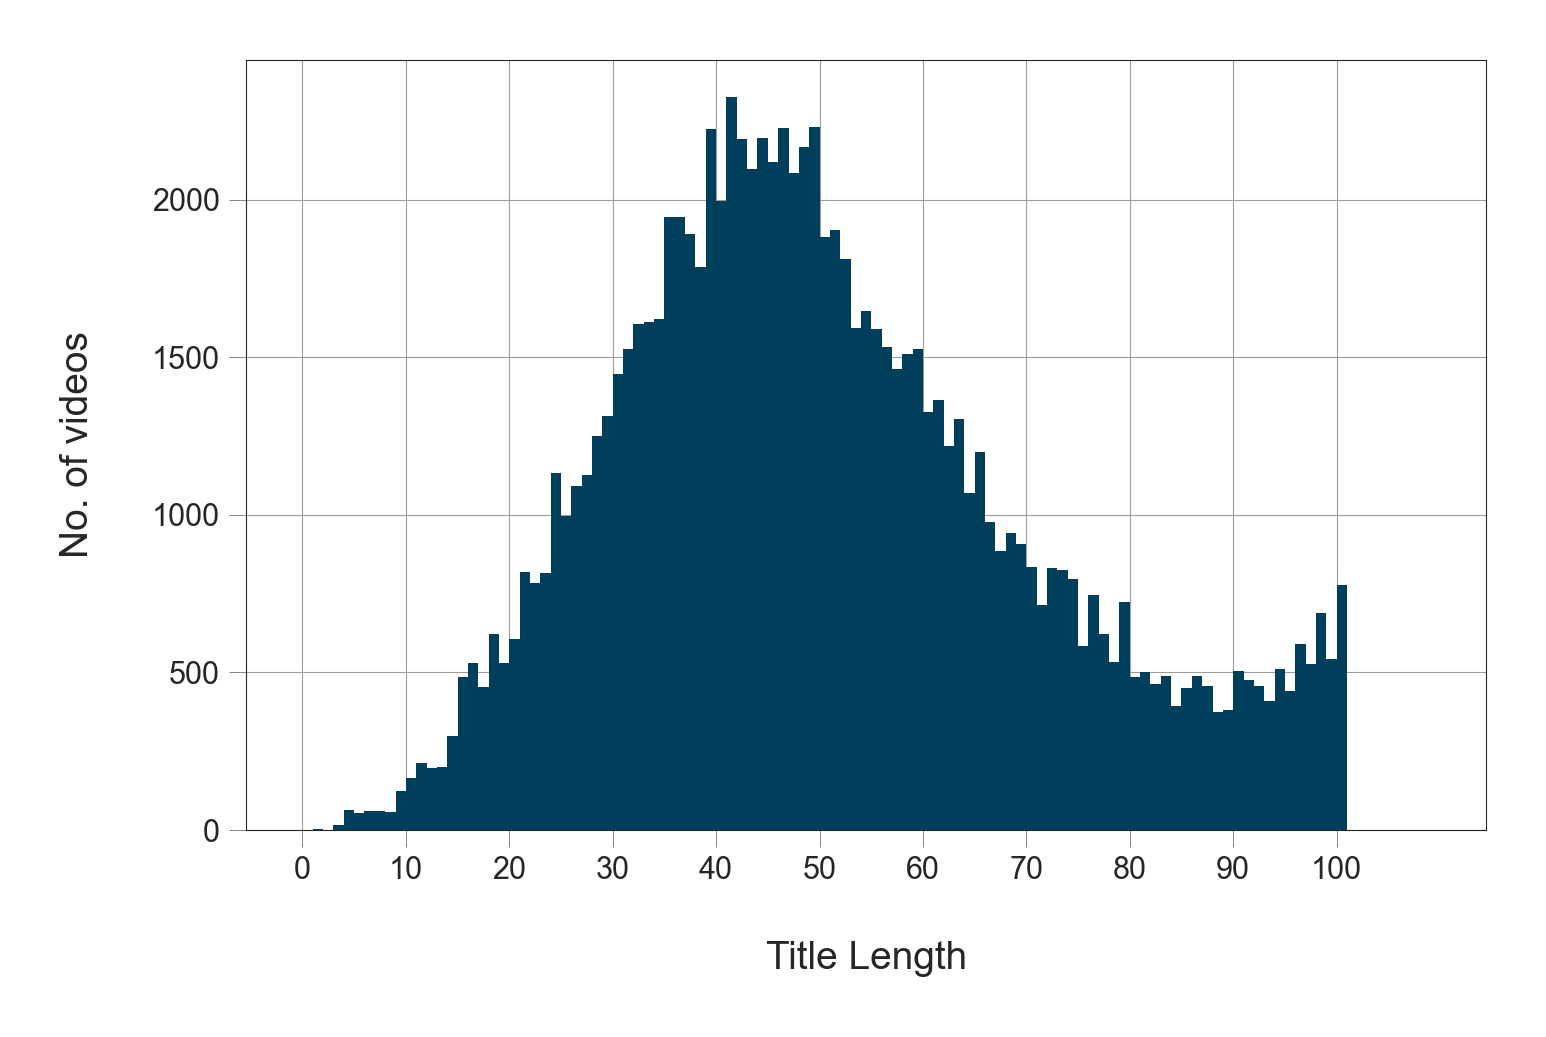

In [25]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.histplot(df["title_length"], kde=False,
                color=PLOT_COLORS[4], alpha=1, ax=ax, bins=range(0, 110, 1))
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

Chúng ta có thể thấy rằng phân phối độ dài tiêu đề giống như một phân phối chuẩn, trong đó hầu hết các video có độ dài tiêu đề nằm trong khoảng từ 30 đến 60 ký tự.

Bây giờ, hãy vẽ một [biểu đồ phân tán](https://www.mathsisfun.com/data/scatter-xy-plots.html) giữa độ dài tiêu đề và số lượt xem để xem mối quan hệ giữa hai biến này

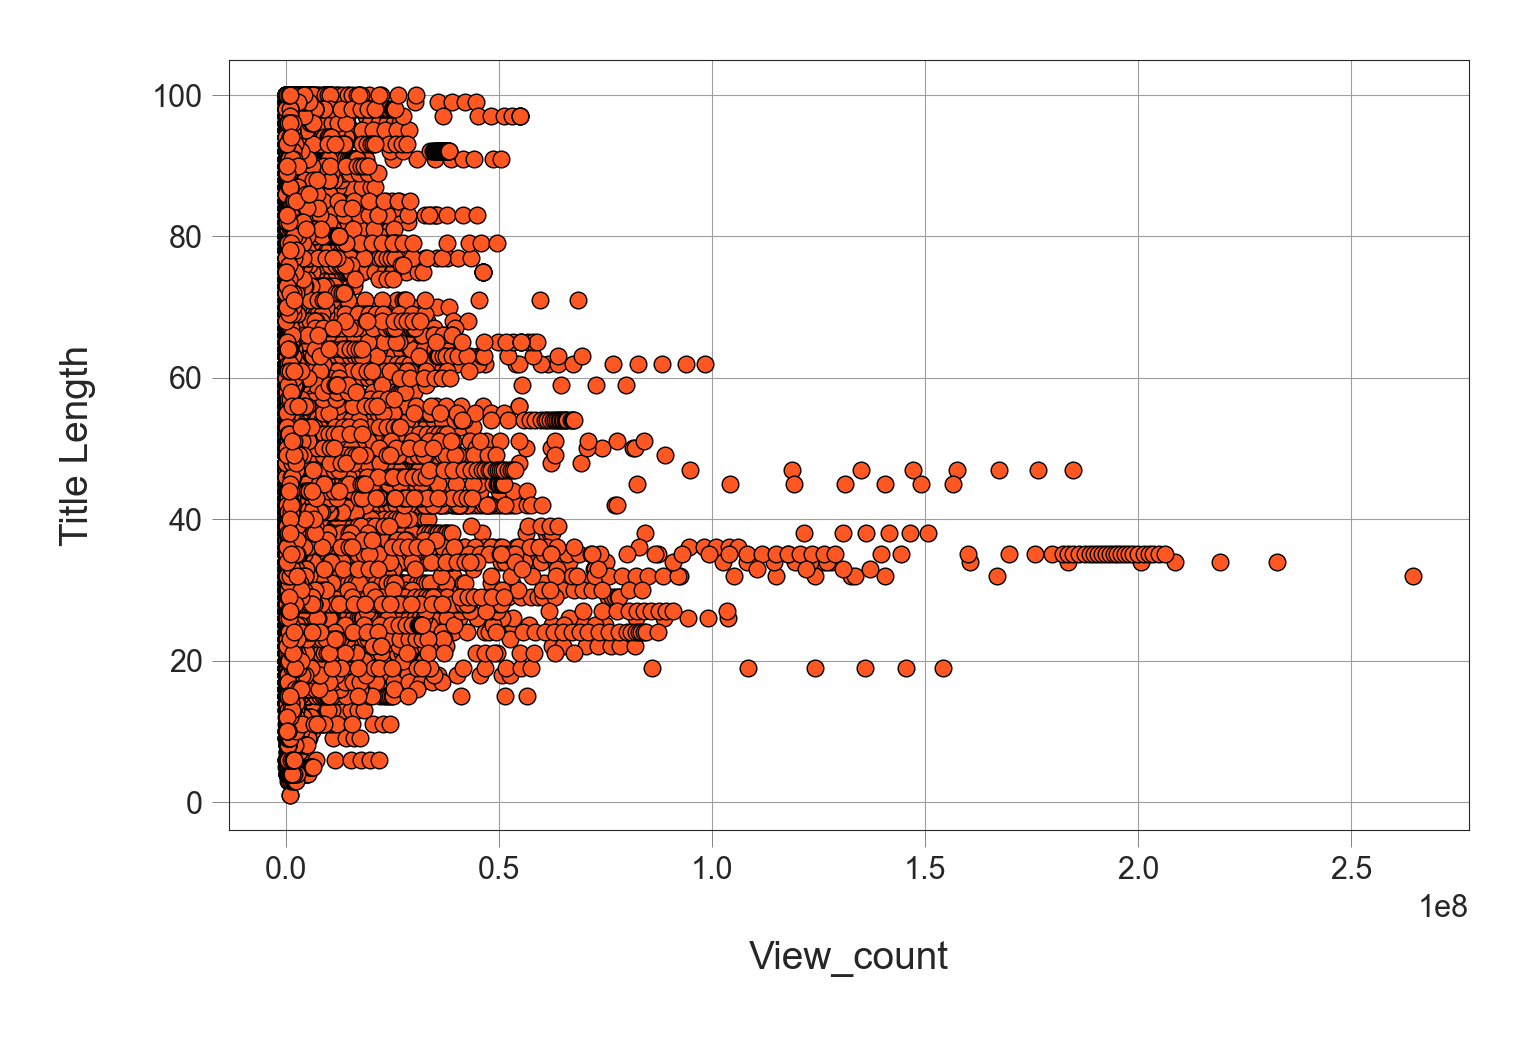

In [26]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['view_count'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="View_count", ylabel="Title Length")

Bằng cách nhìn vào biểu đồ phân tán, chúng ta có thể nói rằng không có mối quan hệ giữa độ dài tiêu đề và số lượt xem. Tuy nhiên, chúng ta nhận thấy một điều thú vị: các video có `100.000.000` lượt xem trở lên có độ dài tiêu đề nằm trong khoảng (xấp xỉ) từ `20` đến `48` ký tự.

## <a name="corr"></a>Tương quan giữa các biến trong bộ dữ liệu

Hãy xem các biến trong bộ dữ liệu [tương quan](https://www.mathsisfun.com/data/correlation.html) với nhau như thế nào: ví dụ, chúng ta muốn xem mối tương quan giữa lượt xem và lượt thích, nghĩa là liệu lượt xem và lượt thích có tăng và giảm cùng nhau (tương quan dương) không? Hay một trong hai tăng khi cái kia giảm và ngược lại (tương quan âm)? Hoặc chúng không tương quan với nhau?

Tương quan được biểu diễn dưới dạng một giá trị từ `-1` đến `+1`, trong đó `+1` biểu thị mối tương quan dương cao nhất, `-1` biểu thị mối tương quan âm cao nhất và `0` biểu thị rằng không có tương quan.

Hãy xem bảng tương quan giữa các biến trong bộ dữ liệu của chúng ta (chỉ các biến số và biến boolean)

In [27]:
numeric_bool_df = df.select_dtypes(include=['number', 'bool'])

correlation_matrix = numeric_bool_df.corr()

correlation_matrix

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,contains_capitalized,title_length
categoryId,1.00,-0.05,-0.08,-0.04,-0.06,0.09,0.01,-0.01,-0.03
view_count,-0.05,1.00,0.85,0.70,0.53,0.00,0.01,-0.01,-0.06
likes,-0.08,0.85,1.00,0.66,0.71,-0.03,-0.03,0.03,-0.10
dislikes,-0.04,0.70,0.66,1.00,0.52,0.01,-0.02,-0.01,-0.04
comment_count,-0.06,0.53,0.71,0.52,1.00,-0.02,-0.01,0.04,-0.05
comments_disabled,0.09,0.00,-0.03,0.01,-0.02,1.00,0.20,-0.01,0.02
ratings_disabled,0.01,0.01,-0.03,-0.02,-0.01,0.20,1.00,-0.01,-0.01
contains_capitalized,-0.01,-0.01,0.03,-0.01,0.04,-0.01,-0.01,1.00,0.15
title_length,-0.03,-0.06,-0.10,-0.04,-0.05,0.02,-0.01,0.15,1.00


Chúng ta thấy, ví dụ như lượt xem và lượt thích có mối tương quan dương rất cao với giá trị tương quan là `0.85`; chúng ta cũng thấy mối tương quan dương cao (`0.71`) giữa lượt thích và số lượng bình luận, và giữa lượt không thích và số lượng bình luận (`0.52`).

Có một số mối tương quan dương giữa lượt xem và lượt không thích, giữa lượt xem và số lượng bình luận, giữa lượt thích và lượt không thích.

Bây giờ hãy trực quan hóa bảng tương quan ở trên bằng cách sử dụng một [heatmap](https://www.wikiwand.com/en/Heat_map).

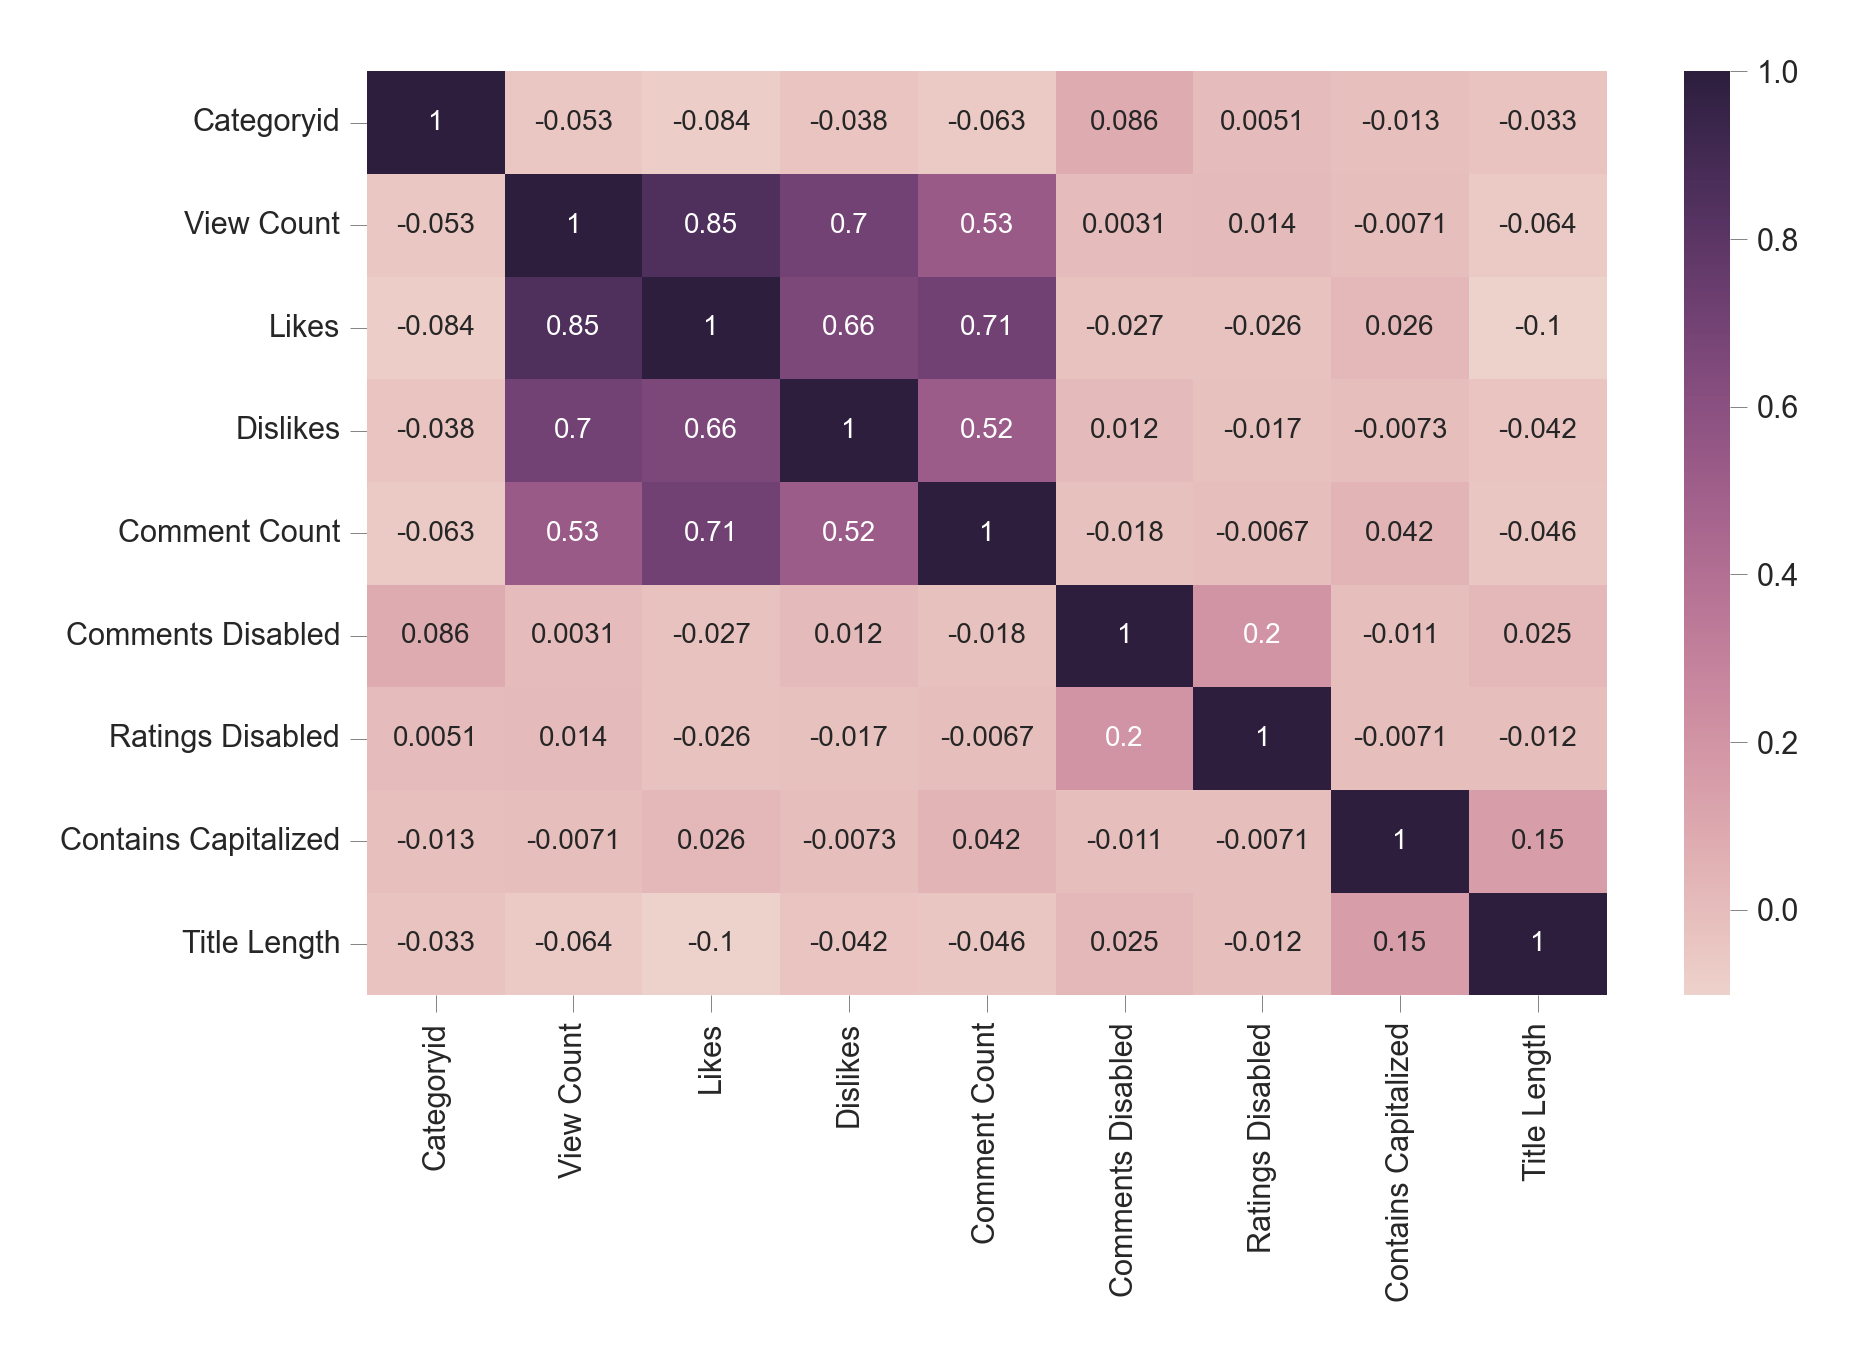

In [28]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(correlation_matrix, annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

Bản đồ tương quan và bảng tương quan ở trên cho thấy rằng lượt xem và lượt thích có mối tương quan dương rất cao. Hãy xác nhận điều đó bằng cách vẽ biểu đồ phân tán giữa lượt xem và lượt thích để trực quan hóa mối quan hệ giữa hai biến này

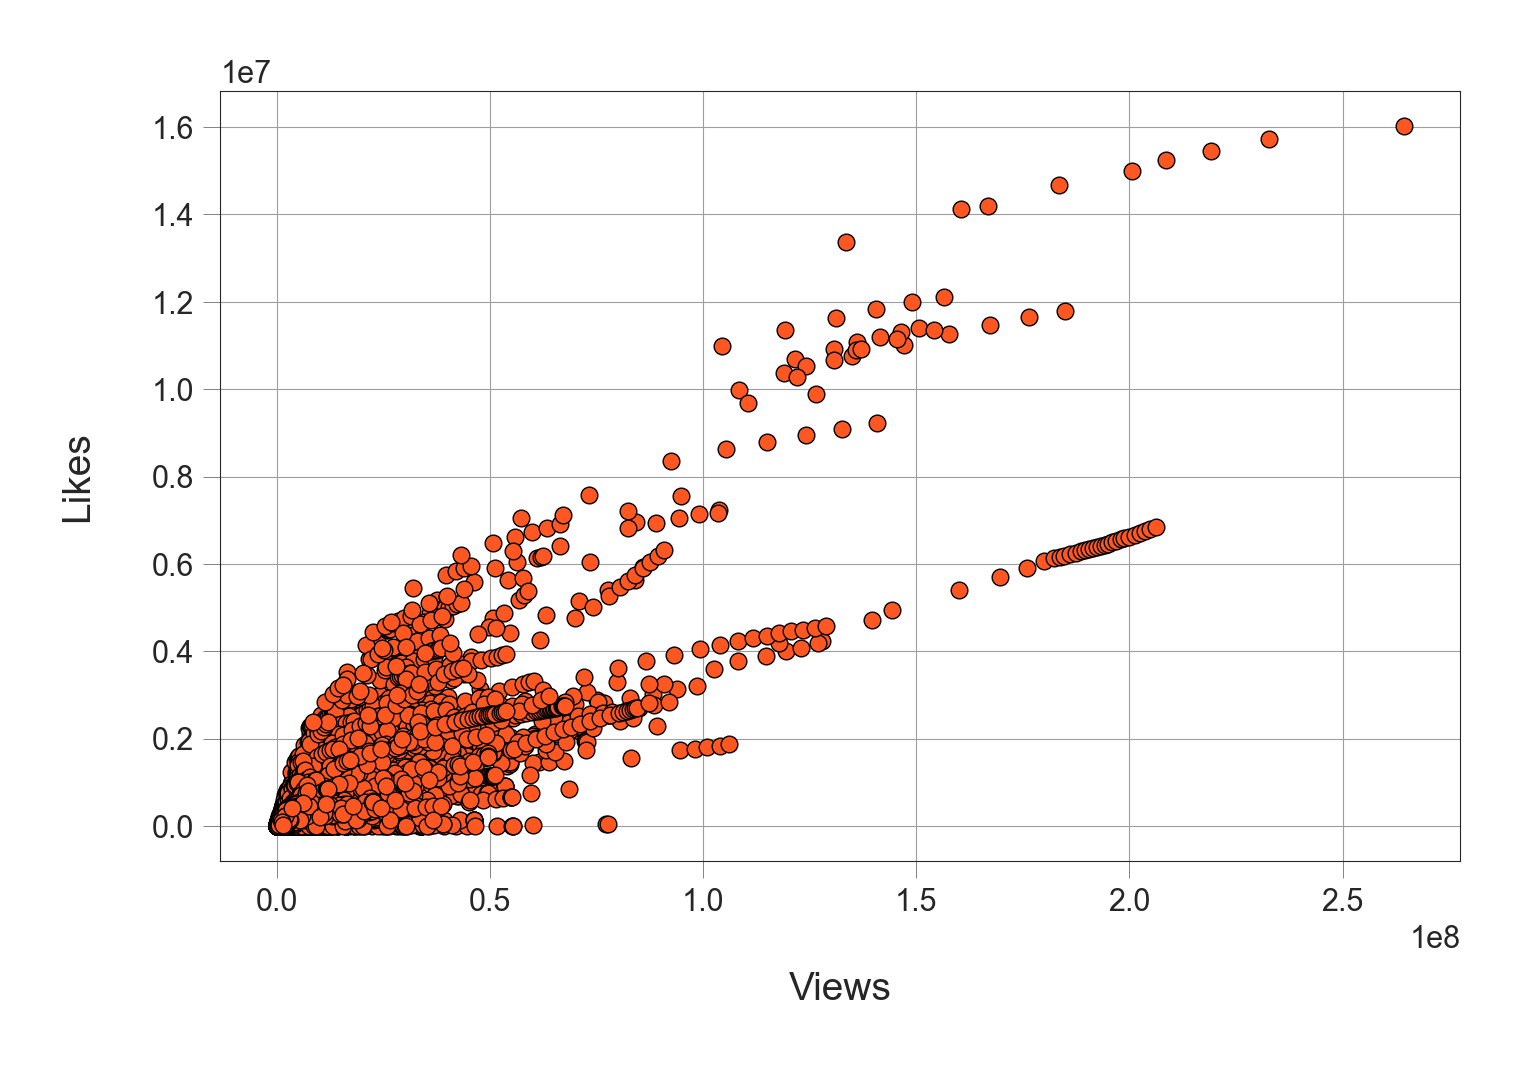

In [29]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['view_count'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

Chúng ta thấy rằng lượt xem và lượt thích thực sự có tương quan dương: khi một biến tăng, biến kia cũng tăng theo.

Một cách kiểm chứng khác cho ma trận và bản đồ tương quan là biểu đồ phân tán mà chúng ta đã vẽ ở trên giữa lượt xem và độ dài tiêu đề, cho thấy rằng không có mối tương quan nào giữa chúng.

## <a name="commti"></a>Các từ phổ biến nhất trong tiêu đề video
Hãy xem nếu có những từ được sử dụng nhiều trong các tiêu đề của video thịnh hành. Chúng ta sẽ biểu thị `25` từ phổ biến nhất trong tiêu đề video thịnh hành

In [30]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 26098),
 ('|', 25178),
 ('The', 12023),
 ('the', 8514),
 ('(Official', 7543),
 ('I', 7195),
 ('Video)', 6840),
 ('&', 6676),
 ('in', 6363),
 ('to', 6213),
 ('a', 5330),
 ('of', 5054),
 ('A', 4213),
 ('Music', 4016),
 ('and', 3995),
 ('Trailer', 3504),
 ('on', 3238),
 ('2021', 3048),
 ('To', 2967),
 ('My', 2906),
 ('Official', 2749),
 ('with', 2638),
 ('Minecraft', 2451),
 ('You', 2373),
 ('at', 2262)]

Ngoại trừ các từ như "the" và "of", ta có thể thấy ký tự "-" và "|" xuất hiện nhiều trong `98591` tiêu đề video thịnh hành: `26098` lần và `25178` lần. Chúng ta cũng nhận thấy rằng các từ "Video," "Music", "Trailer", "2021" và "Minecraft" phổ biến trong các tiêu đề video thịnh hành; mỗi từ xuất hiện trong khoảng 2.451–6.840 tiêu đề.

Hãy tạo một word cloud cho các tiêu đề video thịnh hành, đây là một cách để trực quan hóa những từ phổ biến nhất trong các tiêu đề; từ nào càng phổ biến thì kích thước phông chữ của nó càng lớn

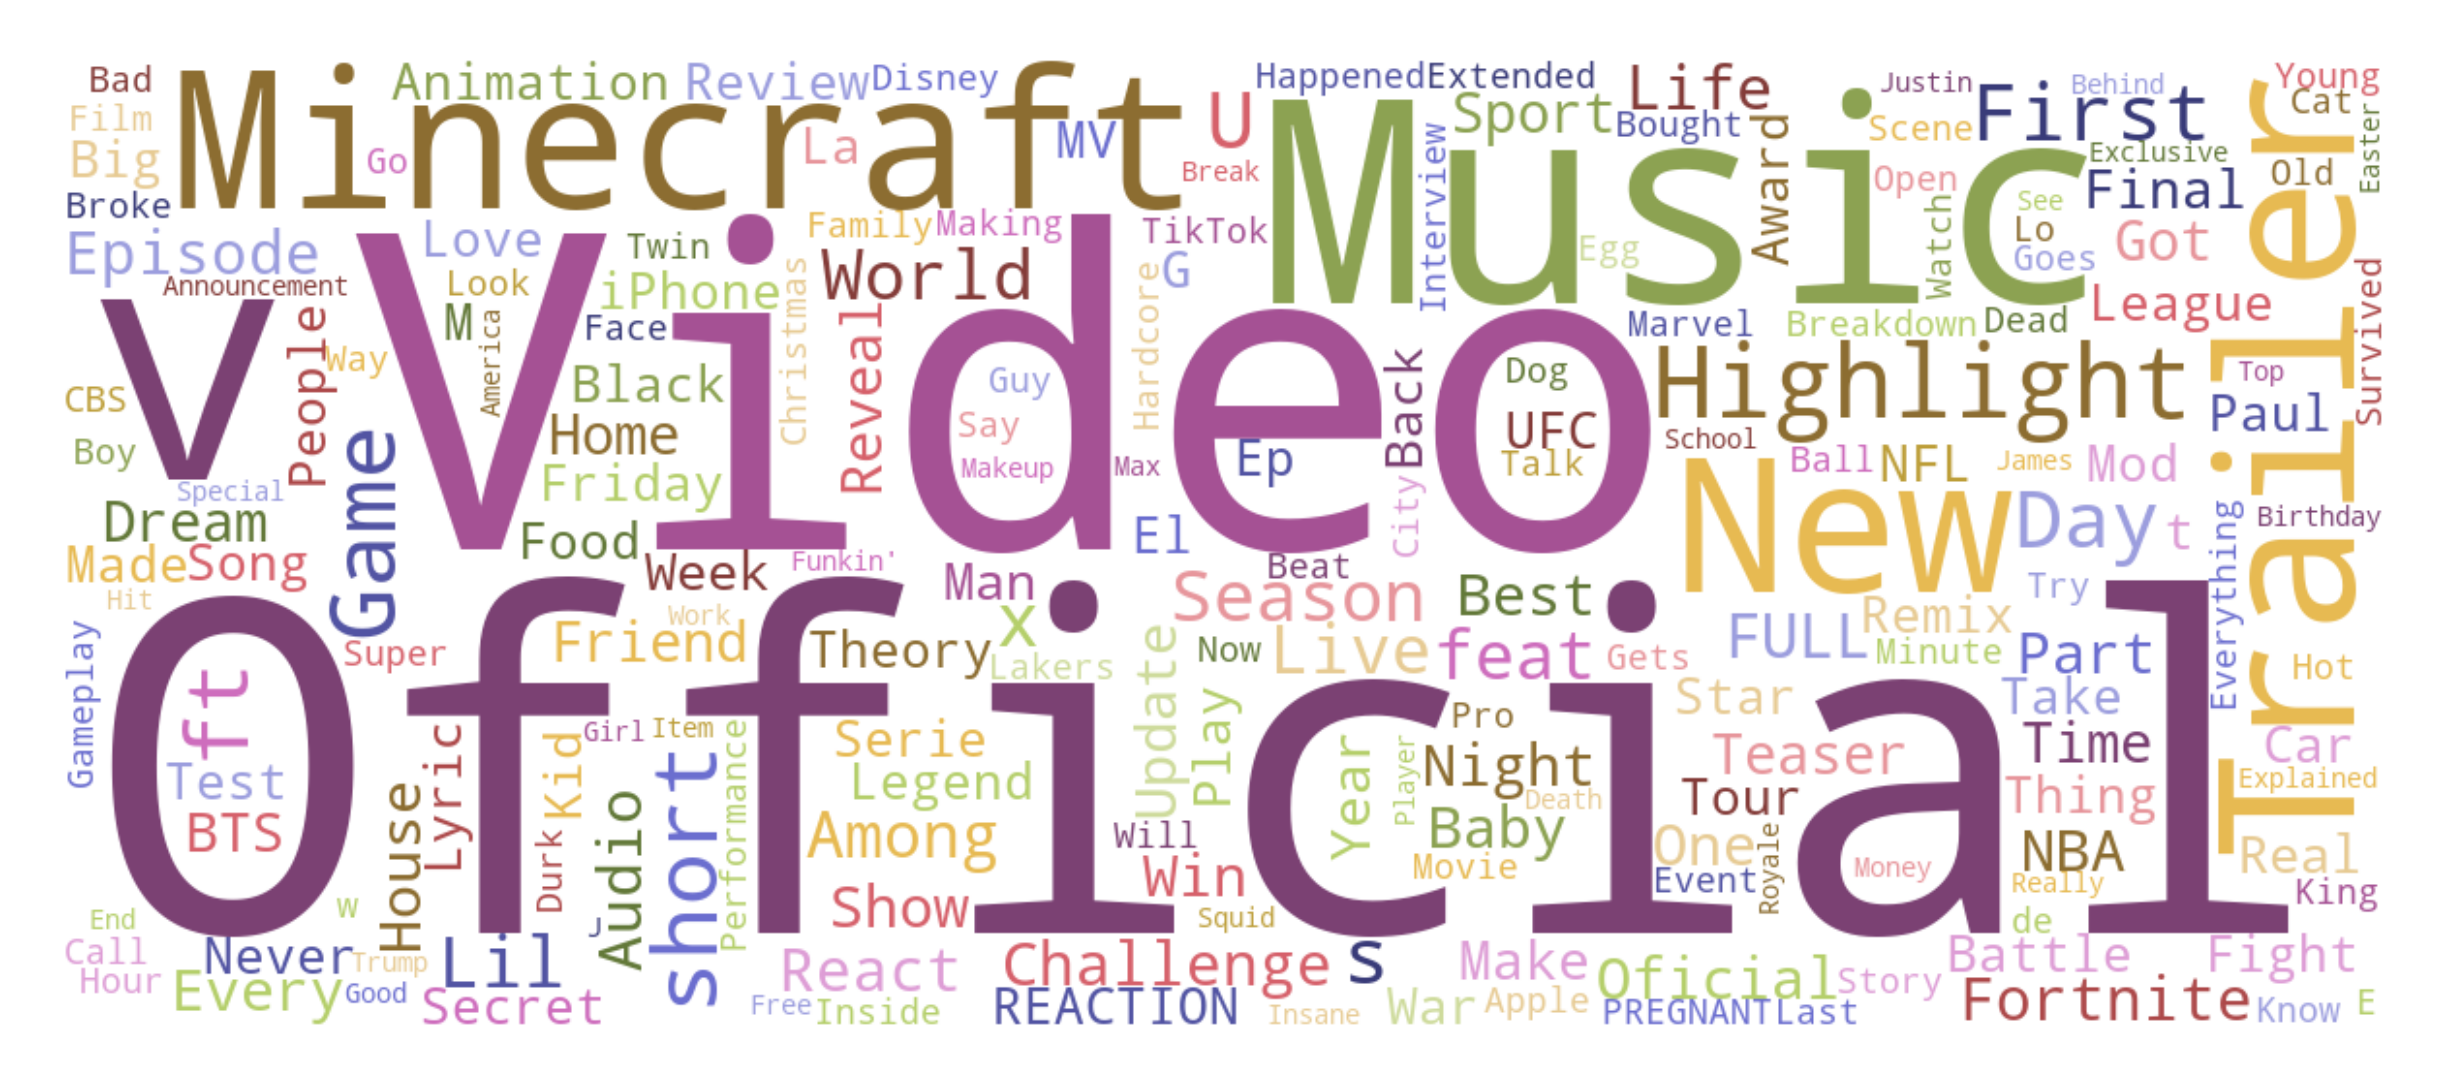

In [31]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                        collocations=False, background_color="white", 
                        colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

## <a name="chan"></a>Các kênh nào có số lượng video thịnh hành lớn nhất?

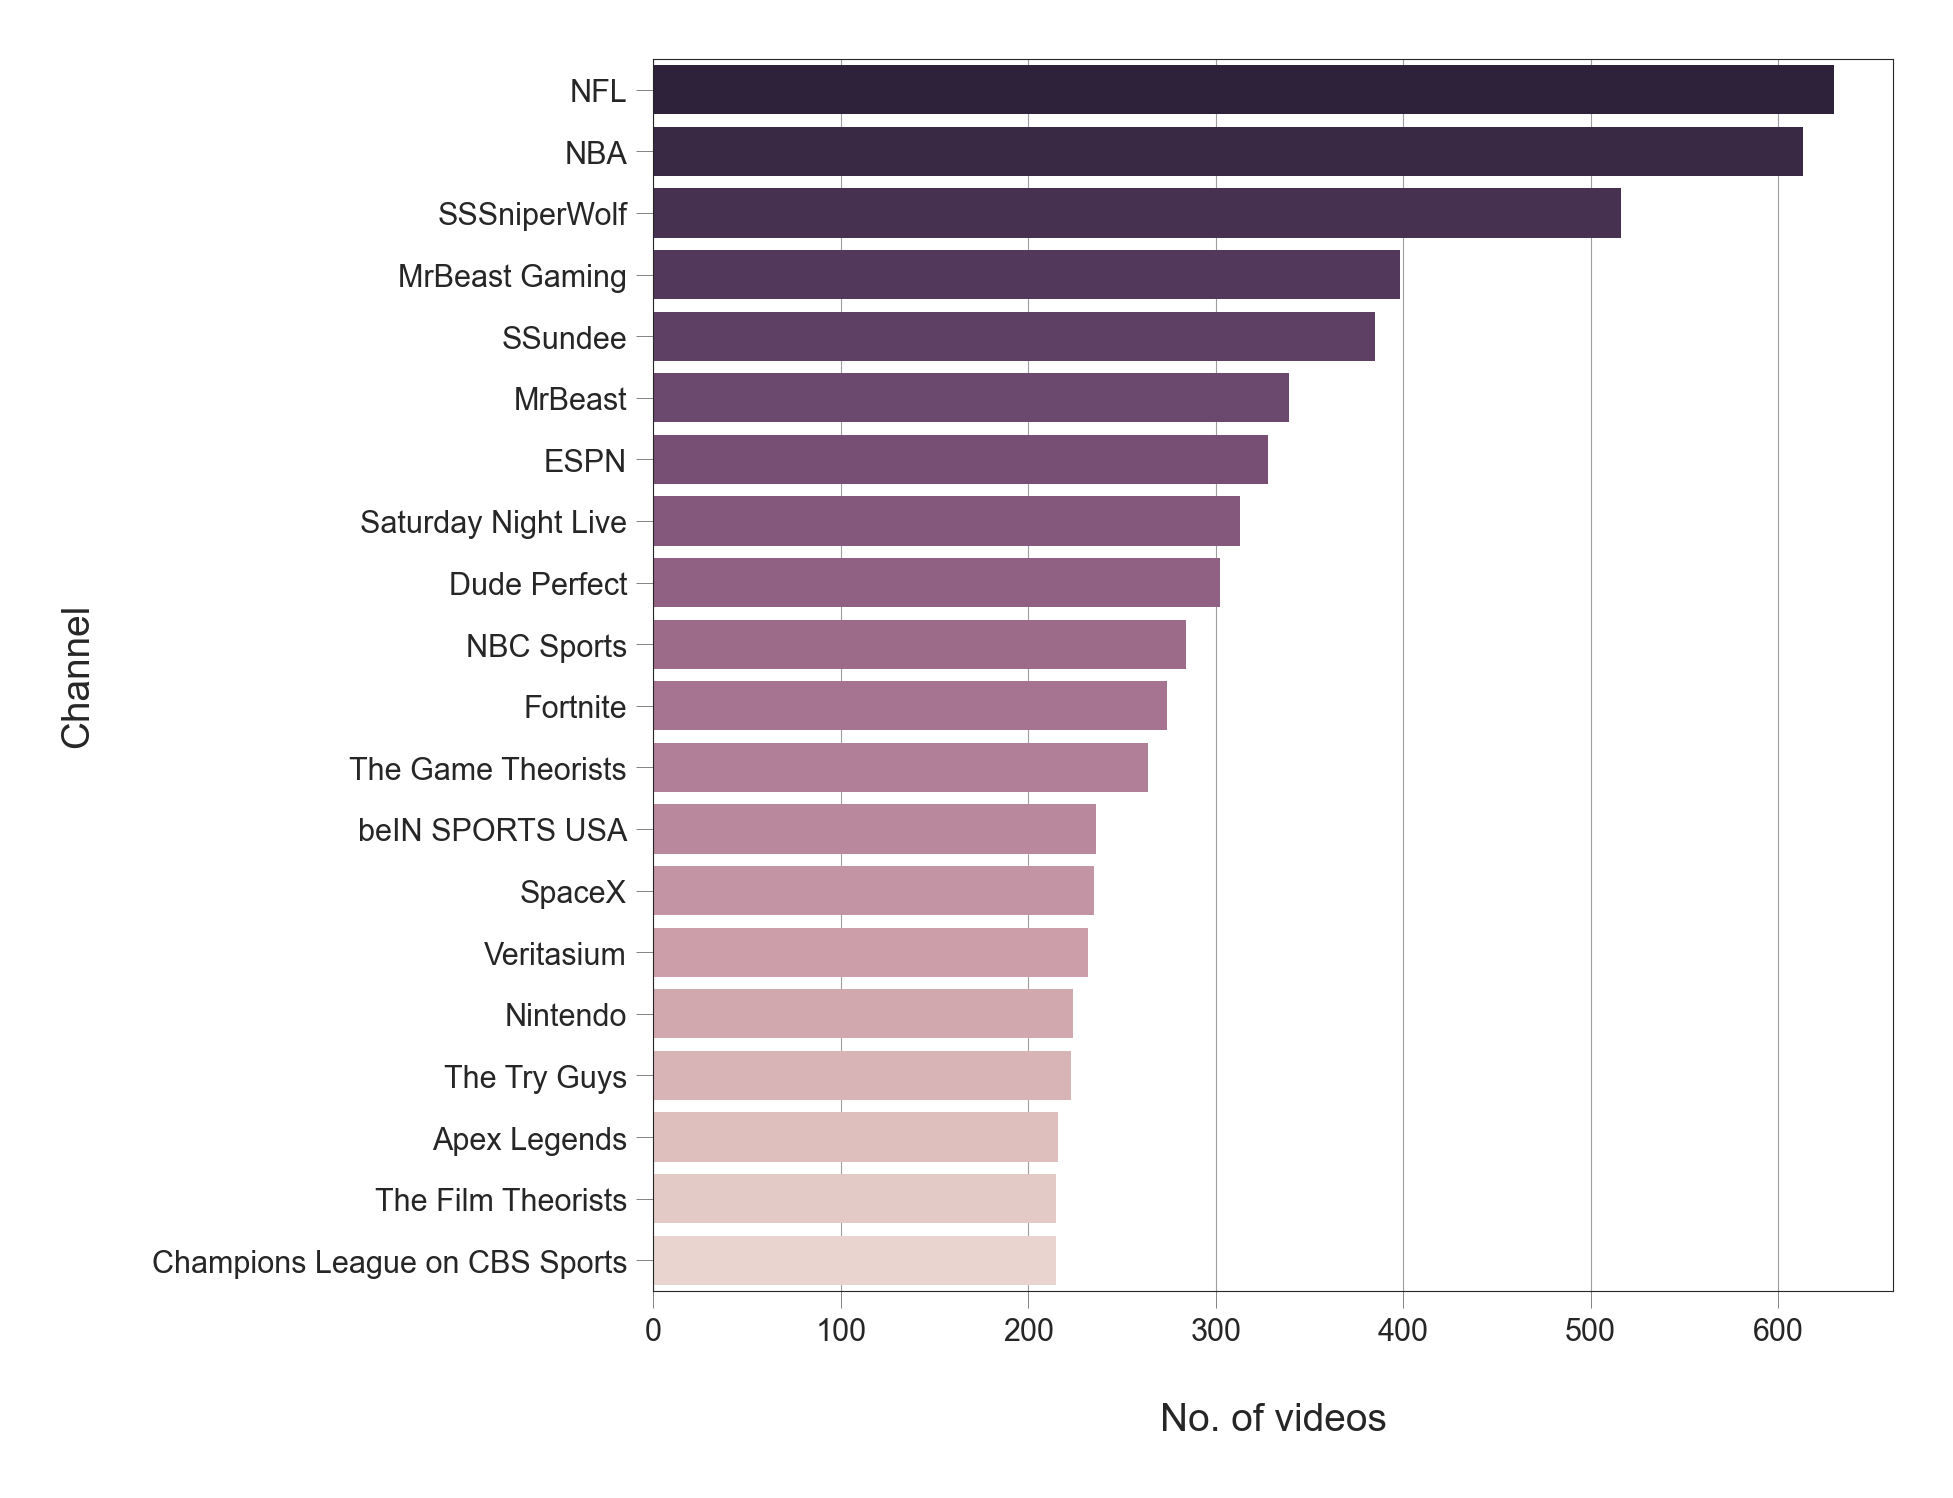

In [32]:
cdf = df.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

## <a name="cat"></a>Danh mục video nào có số lượng video thịnh hành lớn nhất?
Đầu tiên, chúng ta thêm một cột chứa tên danh mục dựa trên các giá trị trong cột `category_id`. Ta sẽ dùng file JSON được cung cấp chung với bộ dữ liệu, chứa thông tin về mỗi danh muck.

In [33]:
with open("input/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['categoryId'].map(cat_dict)

Giờ ta có thể thấy danh mục nào có nhiều video thịnh hành nhất

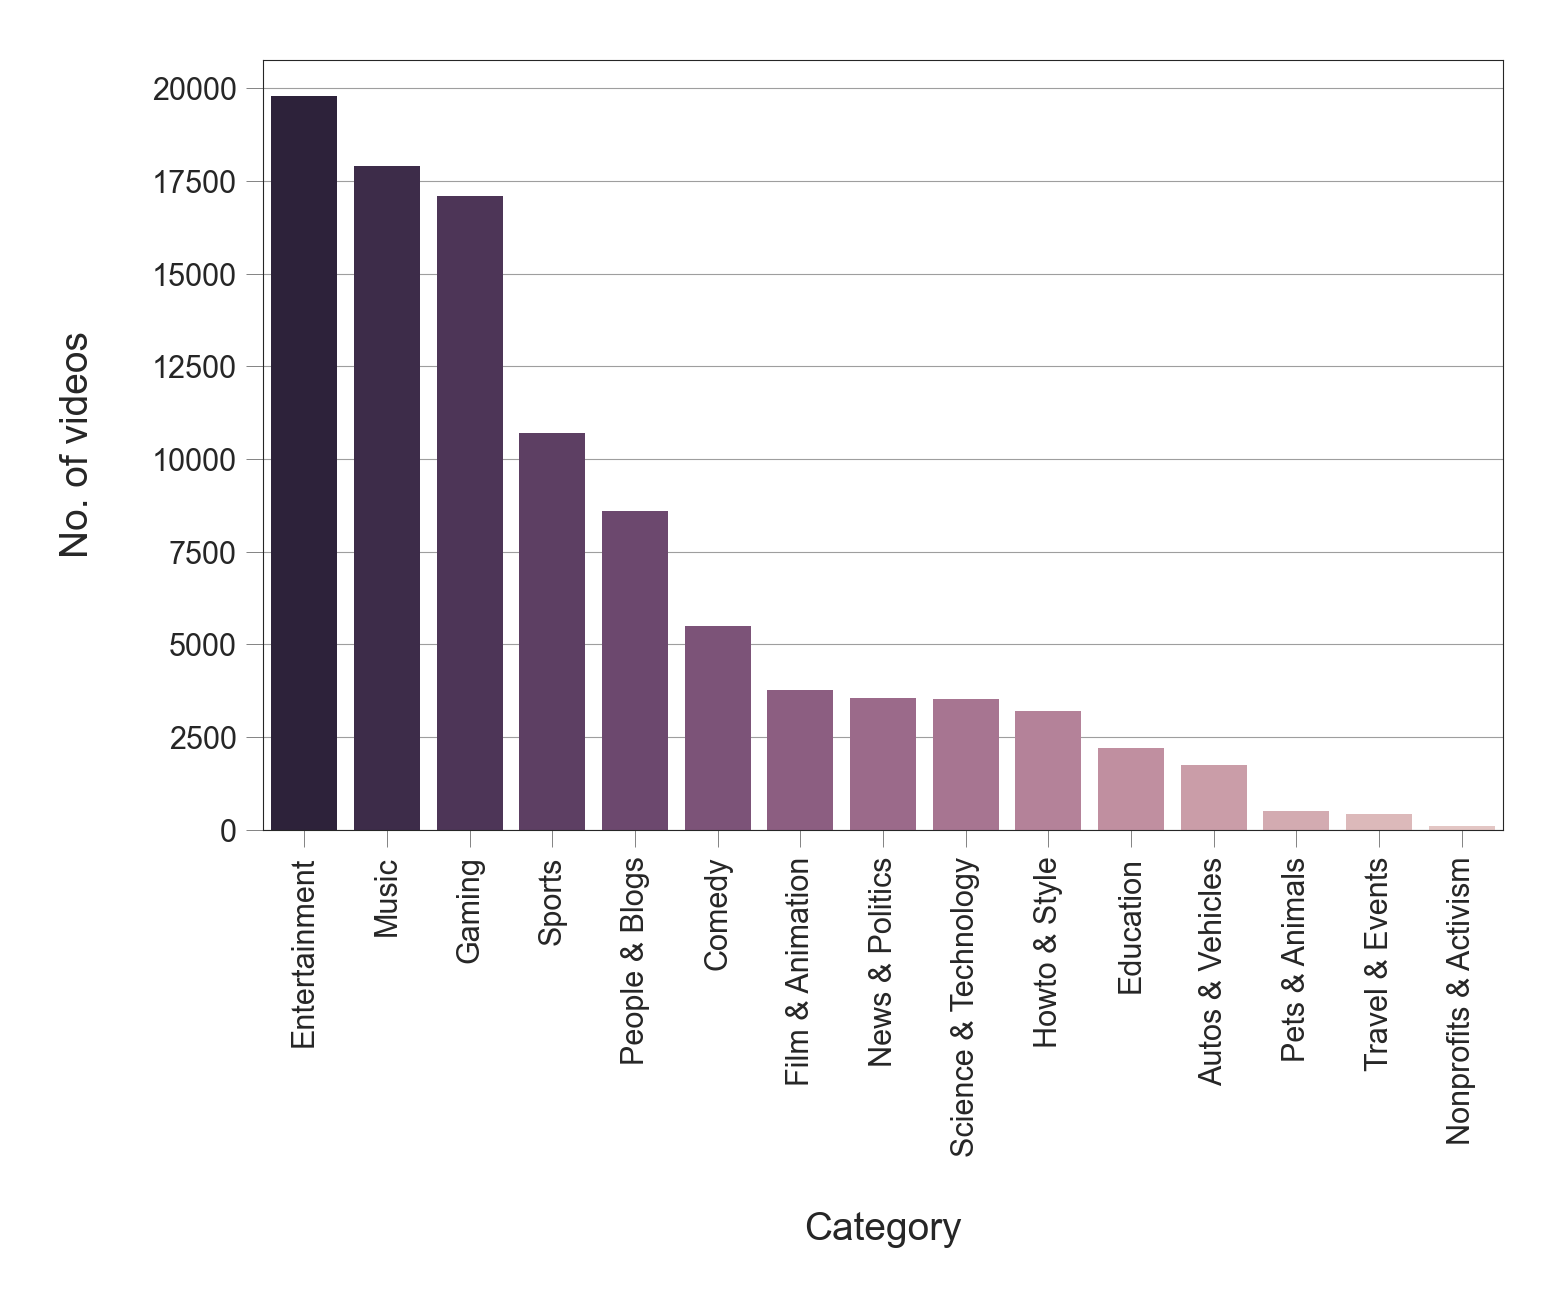

In [34]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "count": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

In [35]:
cdf.head(3)

,category_name,No_of_videos
0,Entertainment,19786
1,Music,17911
2,Gaming,17099


In [36]:
cdf.tail(3)

,category_name,No_of_videos
12,Pets & Animals,515
13,Travel & Events,412
14,Nonprofits & Activism,88


Ta có thể thấy rằng danh mục Entertainment có số lượng video thịnh hành lớn nhất với `19,786` video, kế tiếp là hai danh mục Music với `17,911` video, danh mục Gaming với `17,099` video, và v.v.

## <a name="pub"></a>Thời điểm đăng của video thịnh hành
Một giá trị mẫu của cột `publishAt` trong bộ dữ liệu là `2020-08-11T19:20:14Z`. Theo nguồn thông tin trên trang https://www.w3.org/TR/NOTE-datetime, giá trị này nghĩa là video được đăng vào ngày `2020-08-11` vào thời gian là `19:20:14` trong múi giờ Coordinated Universal Time (UTC) (Giờ Phối hợp Quốc tế).

Hãy thêm hai cột để biểu thị cho ngày và giờ đăng của từng video, sau đó xóa cột `publishedAt` gốc vì chúng ta không cần nó nữa

In [37]:
df["publishing_day"] = df["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publishedAt"].apply(lambda x: x[11:13])
df.drop(labels='publishedAt', axis=1, inplace=True)

Giờ ta có thể thấy những ngày nào trong tuần có số lượng video thịnh hành cao nhất

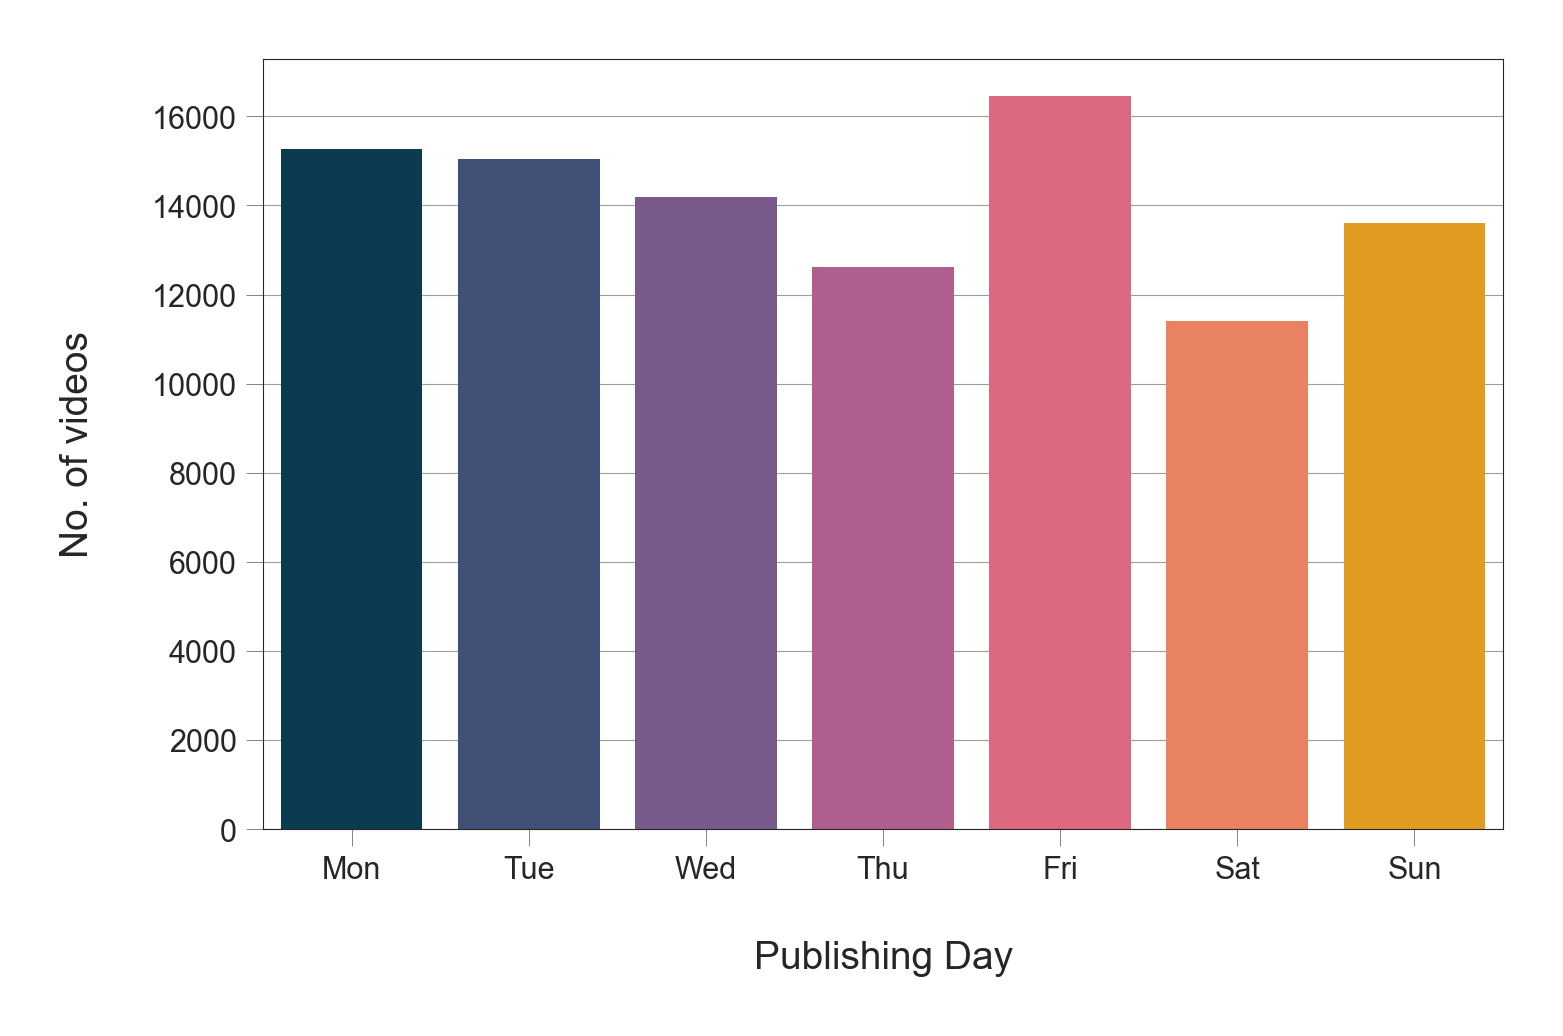

In [38]:
day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "count": "No_of_videos"})       
cdf['publishing_day'] = pd.Categorical(cdf['publishing_day'], categories=day_order, ordered=True)
cdf = cdf.sort_values('publishing_day') # Sắp xếp theo thứ tự ngày trong tuần
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                        '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

Ta có thể thấy rằng số video thịnh hành được đăng lớn nhất vào Thứ 6 và nhỏ nhất vào Thứ 7, tuy nhiên số video được đăng không chênh lệch quá nhiều giữa các ngày trong tuần, nằm trong khoảng `11,500` đến `16,500` video

Giờ ta có thể sử dụng cột `publishing_hour` để thấy giờ có số video thịnh hành được đăng lớn nhất

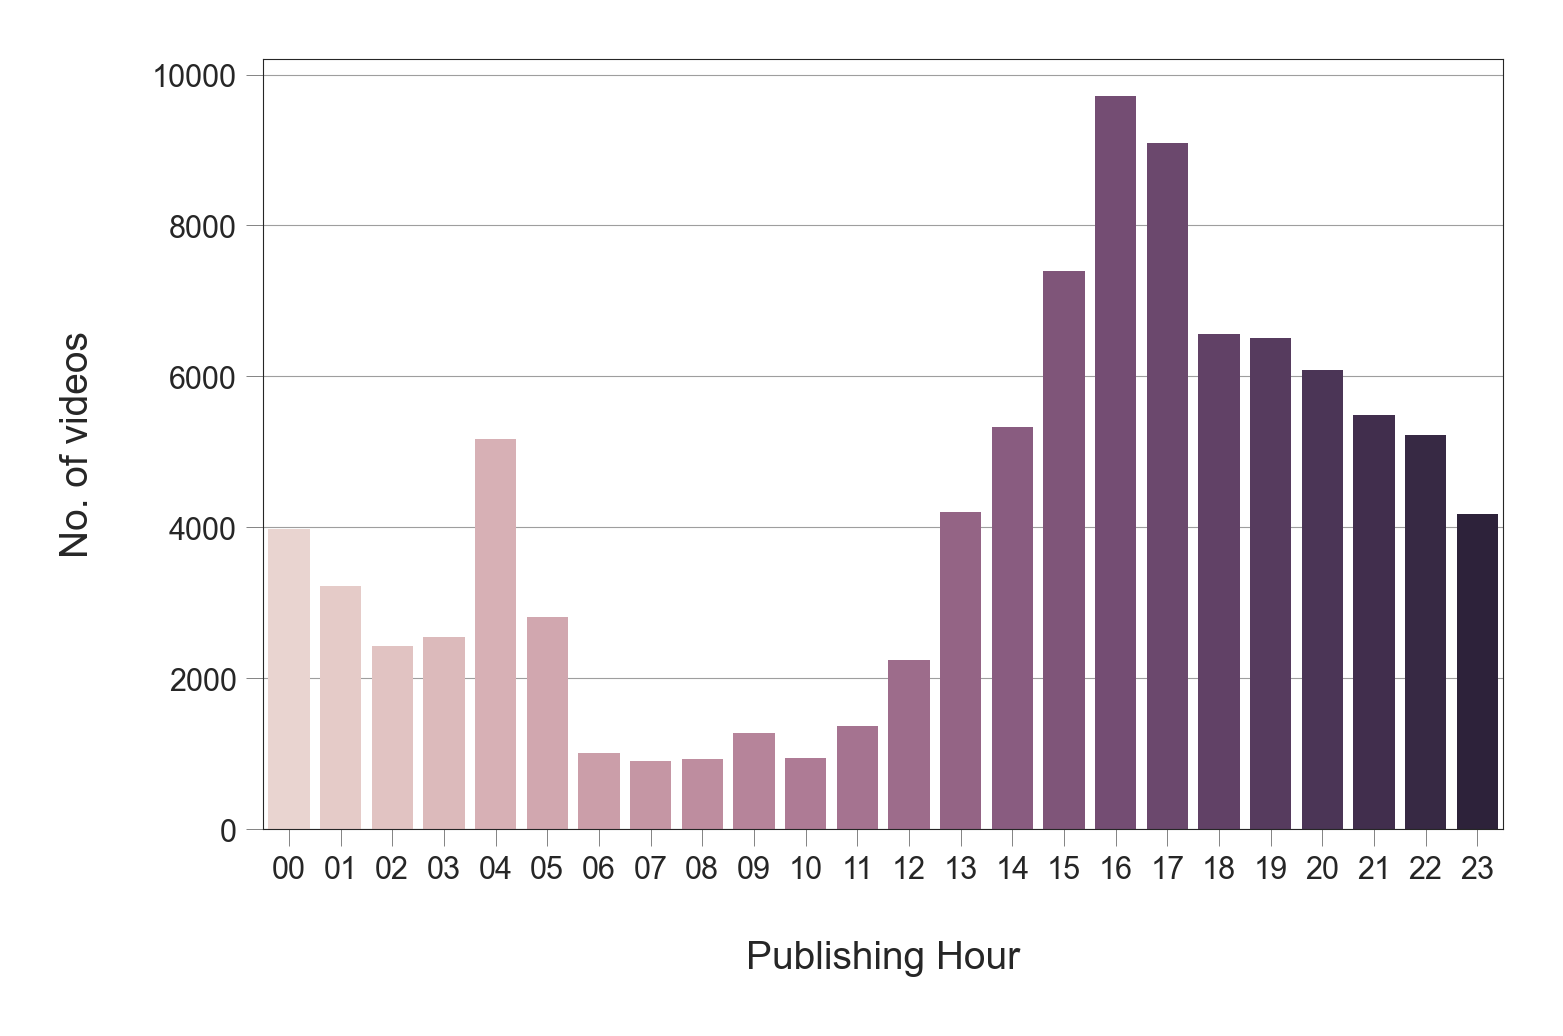

In [39]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "count": "No_of_videos"}).sort_values("publishing_hour", ascending=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

Ta có thể thấy răng  từ 2PM đến 10PM, với đỉnh điểm vào lúc 4PM đến 5PM, có số lượng video thịnh hành lớn nhất. Ta cũng để ý rằng từ 6AM đến 11AM có số lượng video thịnh hành thấp nhất. Vậy lý do là gì? Do video được đăng nhiều hơn vào khung giờ 2PM đến 10PM? Hay do cách thuật toán của Youtube chọn video thịnh hành?

## <a name="commdis"></a>Có bao nhiêu video thịnh hành bị tắt bình luận?
Để biết được, ta sử dụng cột `comments_disabled`

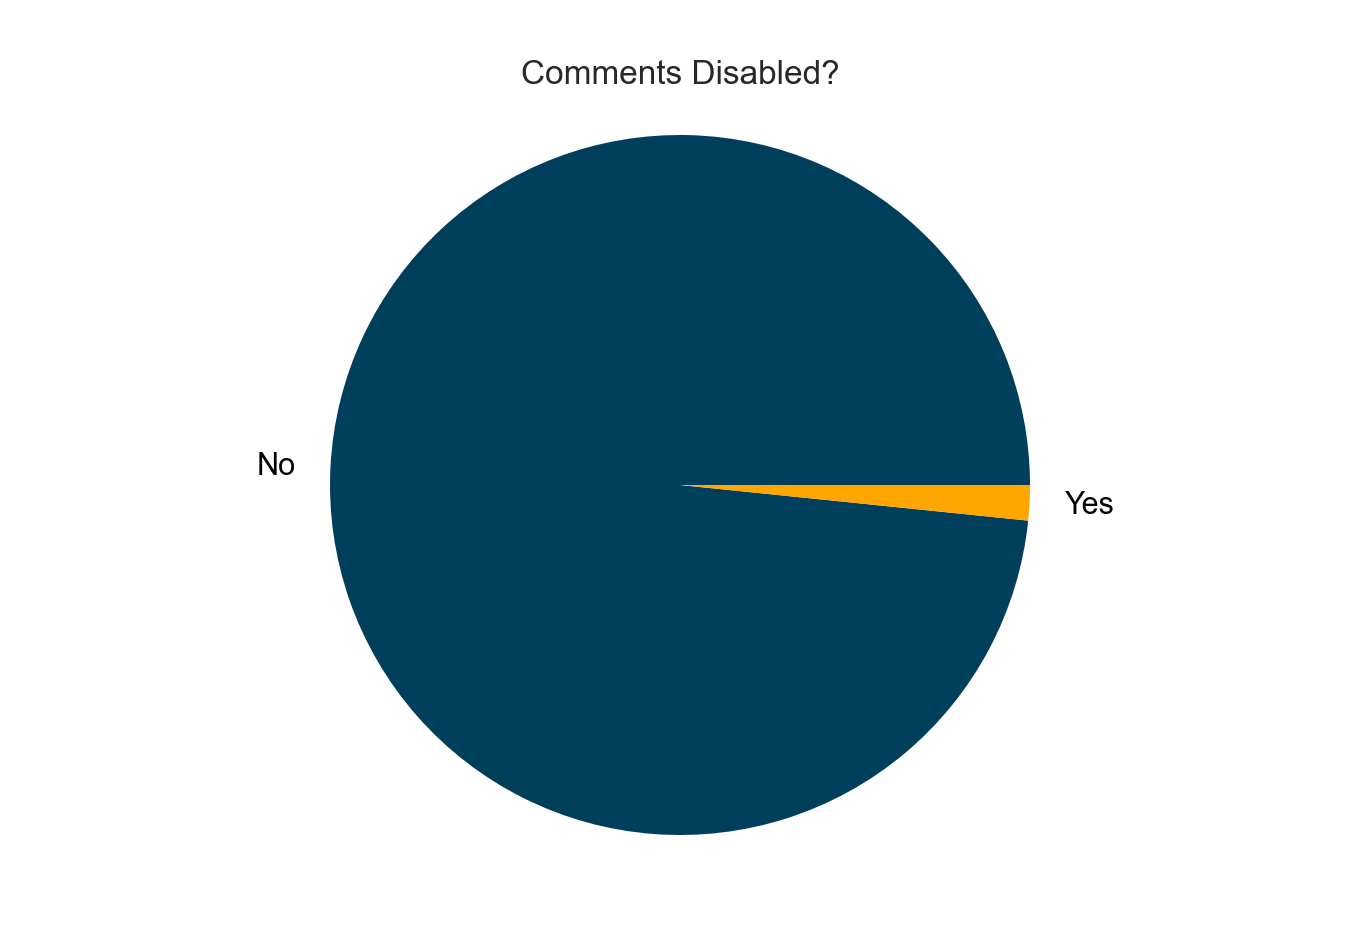

In [40]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [41]:
df["comments_disabled"].value_counts(normalize=True)

comments_disabled
False   0.98
True    0.02
Name: proportion, dtype: float64

Ta có thể thấy chỉ `2%` video thịnh hành tắt bình luận

## <a name="ratdis"></a>Có bao nhiêu video thịnh hành bị tắt đánh giá (lượt thích và không thích)?
Để biết được, ta sử dụng cột `ratings_disabled`

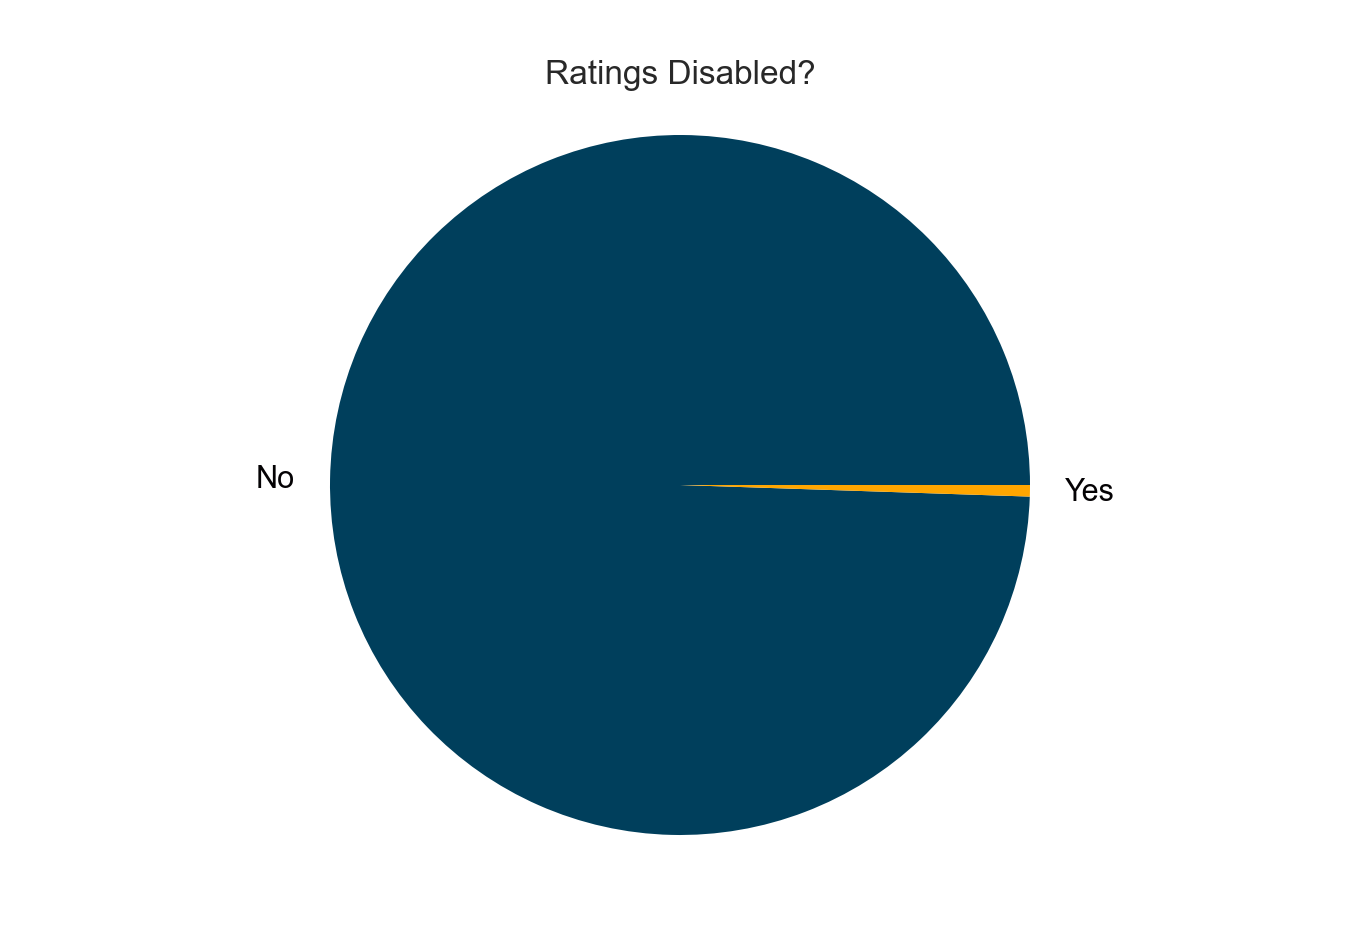

In [42]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [43]:
df["ratings_disabled"].value_counts()

ratings_disabled
False    98071
True       520
Name: count, dtype: int64

Ta có thể thấy chỉ có `520` video thịnh hành trong số `98591` tắt đánh giá

## <a name="commratdis"></a>Bao nhiêu video có cả bình luận và đánh giá bị tắt?

In [44]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

189

Vậy có `189` video thịnh hành tắt cả bình luận và đánh giá

## <a name="conc"></a>Kết luận
Một số kết quả được trích xuất được từ việc phân tích:
* Ta phân tích một bộ dữ liệu chứa thông tin về các video thịnh hành trên Youtube qua 473 ngày. Bộ dữ liệu được thu thập vào năm 2020 và 2021. Nó chứa `98591` video entry.
* `60%` video thịnh hành có ít hơn `1.5` triệu lượt xem, và **`88%`** có ít hơn **`5`** triệu lượt xem.
* `54%` video thịnh hành có ít hơn `60,000` lượt thích, và **`68%`** có ít hơn **`100,000`** lượt thích.
* `51%` video thịnh hành có ít hơn `4,000` bình luận, và **`91%`** có ít hơn **`25,000`** bình luận.
* Một số video có thể xuất hiện trên danh sách video thịnh hành nhiều hơn một ngày. Bộ dữ liệu chứa `98591` entry nhưng không phải `98591` video duy nhất mà là `17403` video duy nhất.
* Các video thịnh hành có **`100,000,000`** lượt xem trở lên có độ dài tiêu đề xấp xỉ trong khoảng `20` and `48` kí tự.
* Các kí tự như `-` and `|` rất phổ biến trong tiêu đề video thịnh hành.
* Các từ 'Video', 'Music', 'Trailer', '2021' và 'Minecraft' cũng phố biến trong tiêu đề video thịnh hành.
* Có sự tương quan dương mạnh mẽ giữa số lượt xem và số lượt thích của video thịnh hành: khi một trong hai tăng, cái còn lại cũng tăng và ngược lại.
* Cũng có một mối tương quan dương mạnh mẽ giữa số lượt thích và số lượt bình luận, và một mối tương quan yếu hơn một chút giữa số lượt không thích và số lượt bình luận.
* Danh mục có số lượng video thịnh hành lớn nhất là **'Entertainment'** với `19,786` video, kế tiếp là danh mục 'Music' với `17,911` video, sau đó là danh mục Gaming với `17,099` video.
* On the opposite side, the category that has the smallest number of trending videos is 'Shows' with `57` videos, followed by 'Nonprofits & Activisim' with `57` videos, followed by 'Autos & Vehicles' with `384` videos.
* Ngược lại, danh mục có số video thịnh hành nhỏ nhất là 'Nonprofits & Activism' với `88` video, kế tiếp là danh mục 'Travel & Events' với `412` video, sau đó là danh mục 'Pets & Animals' với `515` video.
